<a href="https://colab.research.google.com/github/VHP2305/Classification-Capstone/blob/main/Airline_Passenger_referral_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **PROJECT NAME : *AIRLINE PASSENGER REFERRAL PREDICTION***
*** ***
*  ##### **Project Type**    - Classification
*  ##### **Contribution**    - Individual
*  ##### **Name**            - Vishal Patel 


# **PROJECT OBJECTIVE : *TO PREDICT WILL PASSENGERS WILL REFER THE AIRLINE TO THEIR FRIENDS***

*****










* # **GITHUB LINK:** 
https://github.com/VHP2305/Classification-Capstone



# **PROBLEM DESCRIPTION :-**
*****
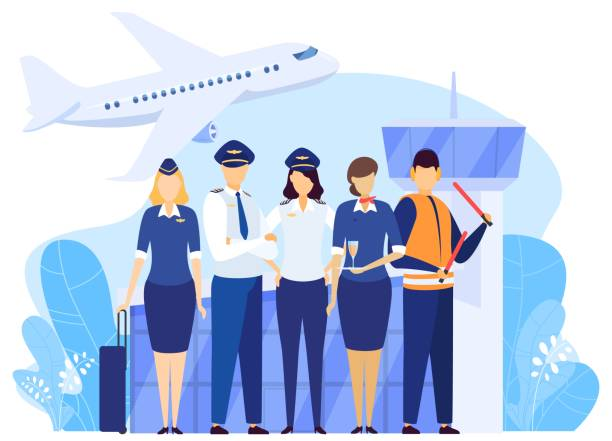


*The Airline passenger Referral system has become the most important criteria globally for the airline industry in order to address the surge which has been created after global pandemic so as to remain in the global market competition. Airline referral system generally works on customer reviews which is basically sentiment given by the customer depending upon various factor like seat comfort, their trip distance, route they have travelled, timing, the airline frequency, ground service etc. we will be using classification algorithm to predict whether the passenger will refer the airlines to their friends or not*

 # **BUSINESS CONTEXT:**

*In the airline industry, customer satisfaction and word-of-mouth referrals are crucial for the growth and success of a company. Referrals from satisfied customers can drive new business and enhance the reputation of the airline. However, it can be challenging for airlines to predict which customers are likely to refer them to their friends and family.*

*This is where machine learning can play a vital role. By using historical customer data, a machine learning model can identify patterns and correlations that indicate a high likelihood of referral. This information can then be used by airlines to target specific customers with personalized marketing campaigns or incentives, increasing the chances of referral and promoting growth.*

*The model can take into account various factors such as customer demographics, flight history, and in-flight experience to make its predictions. Additionally, the model can be regularly updated with new data to maintain its accuracy and relevance.*

*In conclusion, a machine learning model that predicts the likelihood of referral can provide valuable insights for airlines looking to enhance their customer satisfaction and drive growth through word-of-mouth referrals.*

## ***Project Work flow :***

* #### *Importing Libraries*
* #### *Loading the Dataset*
* #### *EDA on features*
* #### *Feature Engineering*
* #### *Data Cleaning*
* #### *Feature selection*
* #### *Fitting the classification models and HyperParameter Tuning*
* #### *Comparison of Models*
* #### *Final selection of the model*


******

# **DATA PREPARATION:**

In [ ]:
#Mount the drive to load the dataset 
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm

# importing required classes for model selection.
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# importing model evaluation metrics.
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# importing warnings library to avoid unnecessary warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount the drive to load the dataset 
file_path ='/content/drive/MyDrive/Colab Notebooks/ML Module/Classification Capstone Project/data_airline_reviews.xlsx' 
airline_df=pd.read_excel(file_path)

In [ ]:
# List of Ten sample Data :
airline_df.sample(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
12487,KLM Royal Dutch Airlines,9.0,Lindy Kroese,22nd September 2018,âœ… Trip Verified | Amsterdam to Abu Dhabi . T...,NaN,Family Leisure,Economy Class,Amsterdam to Abu Dhabi,September 2018,4.0,5.0,5.0,5.0,4.0,5.0,yes
80183,EVA Air,10.0,Rafael Suarez,2nd February 2019,âœ… Trip Verified | Jakarta to Houston via Tai...,Boeing 777-300,Solo Leisure,Premium Economy,Jakarta to Houston via Taipei,January 2019,5.0,5.0,5.0,5.0,5.0,5.0,yes
2902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129276,Gulf Air,9.0,Kathryn Austin,8th May 2015,I recently traveled to and from Bahrain using ...,NaN,NaN,Economy Class,NaN,NaN,4.0,5.0,4.0,5.0,NaN,4.0,yes
89755,Air Europa,1.0,I Jewell,4th April 2016,Santa Cruz to London via Madrid with Air Europ...,NaN,Business,Economy Class,VVI to LGW via MAD,April 2016,1.0,3.0,1.0,1.0,1.0,1.0,no
79899,Eurowings,1.0,Marc Guillemard,14th December 2017,âœ… Trip Verified | I was forced by my company...,A319,Business,Economy Class,Dusseldorf to Paris,December 2017,3.0,3.0,1.0,NaN,1.0,1.0,no
8821,Emirates,7.0,Noah Kaelin,11th August 2014,We had a long journey. We flew from Zurich to ...,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,3.0,5.0,NaN,4.0,yes
52440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# List of Columns of dataset :
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

*The recommended column is the dependent variable rest of them are feature column*

*Let's see if we can understand what do these columns mean:*

#### ***The Dataset contains features lke:***



*   airline: Name of the airline.
*   overall: Overall point is given to the trip between 1 to 10.

*   author: Author of the trip

*   reviewdate: Date of the Review

*   customer review: Review of the customers in free text format

*   aircraft: Type of the aircraft
*   travellertype: Type of traveler (e.g. business, leisure)


*   cabin: Cabin at the flight


*   date flown: Flight date


*   seatcomfort: Rated between 1-5

*   cabin service: Rated between 1-5

*   foodbev: Rated between 1-5

*   entertainment: Rated between 1-5
*   groundservice: Rated between 1-5


*   valueformoney: Rated between 1-5

*   recommended: Binary, target variable





In [ ]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
# shape of the Dataset :
airline_df.shape

(131895, 17)

### Null values and duplicates


We can conclude from the last 10 rows that the dataset contains null values. Let's figure out how many of null values in each column of this massive dataset.

In [ ]:
# checking the Null values
airline_df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

As we can see, approximately 60% of the data in the dataset is null values. Let's look into it further.

In [ ]:
# Checking the duplicate values
len(airline_df[airline_df.duplicated( keep='first')])

70711

There are 70711 duplicate values in the airline dataset. Before we reduce the number of null and duplicate values, let us first determine the actual percentage of missing values.

In [ ]:
# function for finding Missing values :
def missing_values_check(df):
    percent_missing = airline_df.isnull().sum() * 100 / len(airline_df)
    missing_values_df = pd.DataFrame({'column_name': airline_df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [ ]:
# Percentage of missing values :
missing_values_check(airline_df)

,column_name,percent_missing
aircraft,aircraft,85.050229
ground_service,ground_service,70.159597
date_flown,date_flown,69.951097
route,route,69.880587
traveller_type,traveller_type,69.858600
entertainment,entertainment,66.493802
food_bev,food_bev,60.113727
seat_comfort,seat_comfort,53.992949
cabin_service,cabin_service,53.967171
cabin,cabin,52.005004


Based on the results of the above analysis, it is clear that our dataset contains a large number of null values. Because 'recommended' is the target variable here, Let's concentrate the null value count in respect of 'recommended' first.

In [ ]:
#Creating a copy before the data preparation and analysis
airline_df_copy =airline_df.copy()


In [ ]:
# Let's create a dataset where columns contain null values in respect to 'recommended' column
recommended_nulvalues = airline_df[airline_df['recommended'].isnull()]

In [ ]:
# count of null values in the new dataset
airline_df['recommended'].isnull().sum()

67455

In [ ]:
# using function to check the null values percentage
missing_values_check(recommended_nulvalues)

,column_name,percent_missing
aircraft,aircraft,85.050229
ground_service,ground_service,70.159597
date_flown,date_flown,69.951097
route,route,69.880587
traveller_type,traveller_type,69.858600
entertainment,entertainment,66.493802
food_bev,food_bev,60.113727
seat_comfort,seat_comfort,53.992949
cabin_service,cabin_service,53.967171
cabin,cabin,52.005004


It is clear that the null values in the columns are higher in relation to the 'recommended' column. Because it contains so many null values, this subset of the dataset can affect analysis and prediction. As a result, it is preferable to remove these columns from the original dataset.

In [ ]:
# Let's drop the Null values of all columns with respect to 'recommended' column
airline_df.drop(airline_df[airline_df['recommended'].isnull()].index , inplace = True)

In [ ]:
# Function to check the null value percentage
missing_values_check(airline_df)

,column_name,percent_missing
aircraft,aircraft,69.402545
ground_service,ground_service,38.923029
date_flown,date_flown,38.496276
route,route,38.353507
traveller_type,traveller_type,38.308504
entertainment,entertainment,31.419926
food_bev,food_bev,18.361266
seat_comfort,seat_comfort,5.833333
cabin_service,cabin_service,5.780571
overall,overall,2.963998


In [ ]:
# checking the unique values in the each columns of the dataset
airline_df.nunique()

airline               81
overall               10
author             43289
review_date         3010
customer_review    59750
aircraft            2088
traveller_type         4
cabin                  4
route              24548
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

* There are a large number of aircraft. The percentage of null values in them is also high.
As a result, 'aircraft' column can be removed.
* The percentage of null values in date flown is also high. We can remove this column to reduce the number of null values because we will be focusing more on the reviews and their subset scores.
* The column 'author' has no relevance to the prediction. As a result, this column can also be removed.

In [ ]:
# dropping the columns
airline_df.drop(['author','aircraft','date_flown'] , axis = 1 , inplace = True)

In [ ]:
# Again let's check the null value count in each columns
missing_values_check(airline_df)

,column_name,percent_missing
ground_service,ground_service,38.923029
route,route,38.353507
traveller_type,traveller_type,38.308504
entertainment,entertainment,31.419926
food_bev,food_bev,18.361266
seat_comfort,seat_comfort,5.833333
cabin_service,cabin_service,5.780571
overall,overall,2.963998
cabin,cabin,1.765984
value_for_money,value_for_money,0.721601


There are still a lot of null values. Let's remove the rows that still have null values in them.

In [ ]:
# Dropping the null value rows
airline_df.dropna(axis=0,how='any',inplace = True)

In [ ]:
# First 5 rows of dataset
airline_df.head()

,airline,overall,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,no


Now, Let's check the duplicate values in the remaining dataset

In [ ]:
#Checking the number of duplicates in the dataset
len(airline_df[airline_df.duplicated( keep='first')])

1744

There are 1744 duplicate values present in our dataset . Let's remove them.

In [ ]:
#Removing the duplicates
airline_df.drop_duplicates(keep='first', inplace = True)

In [ ]:
#confirming that the duplicate rows are deleted
len(airline_df[airline_df.duplicated( keep='first')])

0

In [ ]:
# Function to check the null values 
missing_values_check(airline_df)

,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
review_date,review_date,0.0
customer_review,customer_review,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
route,route,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0


Now, its look clean. Let's check the shape of airline dataset.

In [ ]:
airline_df.shape

(22826, 14)

In [ ]:
# Comparing the size of changed dataset with original dataset and calculating its percentage
perc =(len(airline_df)/len(airline_df_copy))  * 100
perc

17.306190530346107

*Approximately 82% of the original data was removed because it contained Null values.*

##Working on Anomaly

### Finding anomaly in overall feature with respect to recommended



In [ ]:
#Function for Stacked plot of rating features
def stacked_plot(feat):
  ''' Stacked plot of rating features'''
  # sns.set_palette('gist_ncar')
  x = airline_df.groupby([airline_df['overall']])
  x[feat].value_counts().unstack().plot(kind= 'bar',stacked = True, figsize=(12,6))

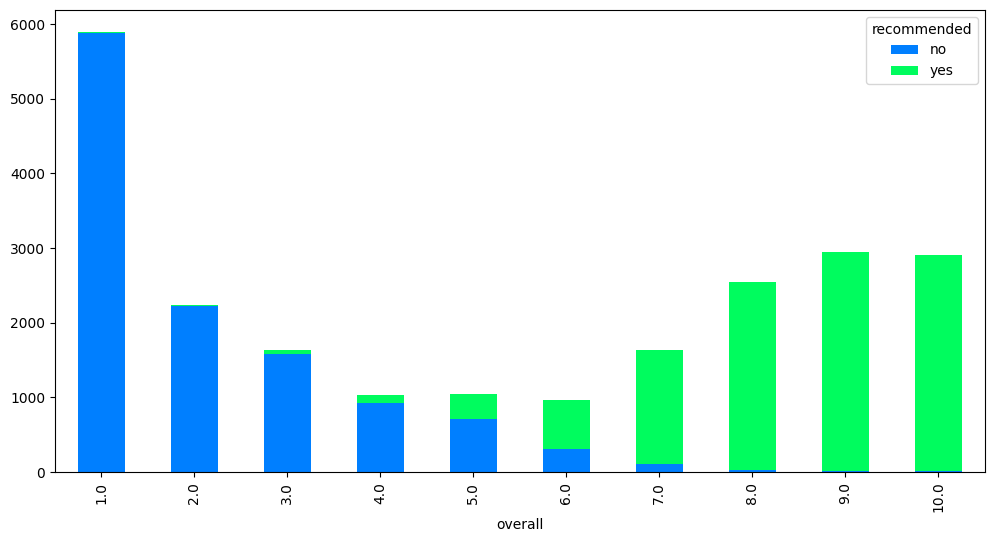

In [ ]:
# Get plot for the relationship between Recommendation and Overall rating.
stacked_plot('recommended')

In [ ]:
airline_df['Avg_num']= (airline_df['seat_comfort']+ airline_df['cabin_service']+ airline_df['food_bev']+airline_df['entertainment']+airline_df['ground_service']+airline_df['value_for_money'])//6

In [ ]:
airline_df.head(3)

,airline,overall,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,Avg_num
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,yes,3.0
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,no,1.0
5,Turkish Airlines,3.0,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,no,2.0


In [ ]:
airline_df[['overall','recommended']][(airline_df['recommended']=='yes') & (airline_df['overall']<=4)].value_counts()

overall  recommended
4.0      yes            105
3.0      yes             50
2.0      yes             23
1.0      yes             19
dtype: int64

In [ ]:
airline_df[['overall','recommended']][(airline_df['recommended']=='no') & (airline_df['overall']>=8)].value_counts()

overall  recommended
8.0      no             30
10.0     no             10
9.0      no              9
dtype: int64

In [ ]:
# Selecting all rows which have avg_num rating higher than 2 and recommended is yes 
# whereas overall column have rating <=2
wrong_overall = (airline_df['Avg_num']>=3) & (airline_df['recommended']=='yes') & (airline_df['overall']<=5)

In [ ]:
wrong_overall.value_counts()

False    22540
True       286
dtype: int64

In [ ]:
# Replacing overall value to 2* avg value
airline_df.loc[wrong_overall,'overall'] = airline_df.loc[wrong_overall,'Avg_num']*2 

In [ ]:
# Selecting all rows which have avg_num rating less than 2 and recommended is also no  
# but overall column have rating greater than 7
wrong_overall = (airline_df['Avg_num']<=2) & (airline_df['recommended']=='no') & (airline_df['overall']>=6)

In [ ]:
wrong_overall.value_counts()

False    22664
True       162
dtype: int64

In [ ]:
# Replacing overall value to 2* avg value
airline_df.loc[wrong_overall,'overall'] = airline_df.loc[wrong_overall,'Avg_num']*2 

In [ ]:
airline_df.drop(['Avg_num'], axis = 1, inplace = True )

In [ ]:
# trying to find all those values which have low over_all and average value
# and recommended is yes
len(airline_df[(airline_df['overall']<= 3) & (airline_df['recommended']=='yes')])

55

In [ ]:
yes = (airline_df['overall']<= 3) & (airline_df['recommended']=='yes')

In [ ]:
# Replacing recommended  value of yes  to no
airline_df.loc[yes,'recommended'] = 'no'

In [ ]:
# trying to find all those values which have low over_all and average value
# and recommended is yes
len(airline_df[(airline_df['overall']>= 8) & (airline_df['recommended']=='no')])

35

In [ ]:
#Similarly for no 
no = (airline_df['overall']>=8) & (airline_df['recommended']=='no')

In [ ]:
#Replacing recommender value of no to yes
airline_df.loc[no,'recommended'] = 'yes'

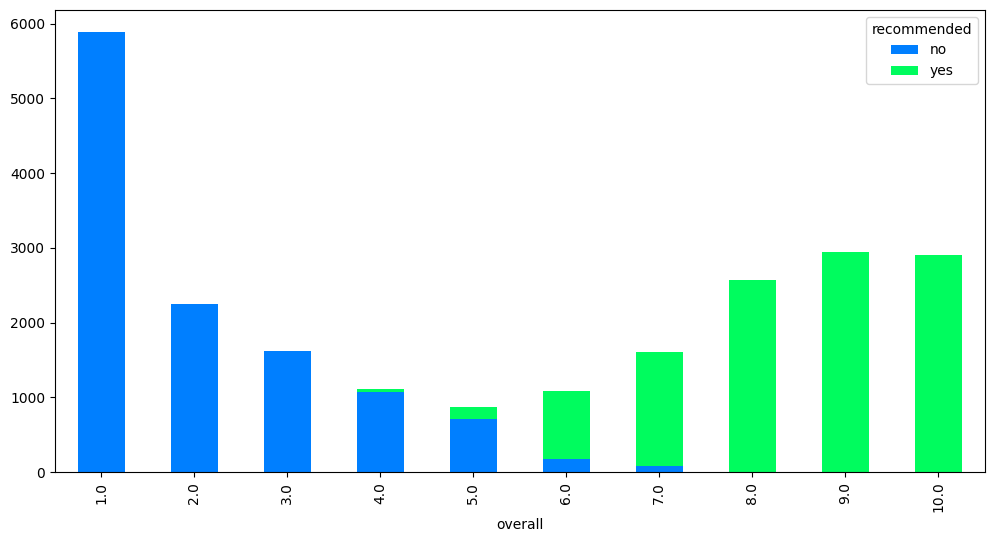

In [ ]:
# Get plot for the relationship between Recommendation and Overall rating.
stacked_plot('recommended')

*Now we will be replacing our y labels from 'yes' and 'no' to 1 and 0 respectively*

In [ ]:
airline_df['recommended'].replace(to_replace=['no', 'yes'], value=[0, 1], inplace = True)


In [ ]:
airline_df

,airline,overall,review_date,customer_review,traveller_type,cabin,route,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,4.0,1.0,1.0,1.0,1.0,1.0,0
5,Turkish Airlines,3.0,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,1.0,4.0,1.0,3.0,1.0,2.0,0
7,Turkish Airlines,10.0,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,4.0,5.0,5.0,5.0,5.0,5.0,1
9,Turkish Airlines,1.0,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131696,Ukraine International,1.0,6th August 2015,Never flying them again and discourage anyone ...,Family Leisure,Economy Class,New York to Lviv,1.0,1.0,1.0,1.0,1.0,1.0,0
131698,Ukraine International,1.0,2nd August 2015,Flight from JFK to Kiev was cancelled on July ...,Family Leisure,Economy Class,JFK to Tel Aviv via Kiev,1.0,2.0,1.0,1.0,1.0,1.0,0
131702,Ukraine International,10.0,20th July 2015,Clean and comfortable cabin. We were offered a...,Couple Leisure,Economy Class,KBP to RIX,5.0,5.0,5.0,4.0,4.0,4.0,1
131704,Ukraine International,2.0,18th July 2015,The staff lacked knowledge of the English lang...,Solo Leisure,Economy Class,Yerevan to Warsaw via Kiev,1.0,1.0,1.0,1.0,1.0,1.0,0


We are now finished cleaning the data.

# **EXPLORATORY DATA ANALYSIS AND VISUALIZATION:**

<Axes: xlabel='cabin', ylabel='cabin_service'>

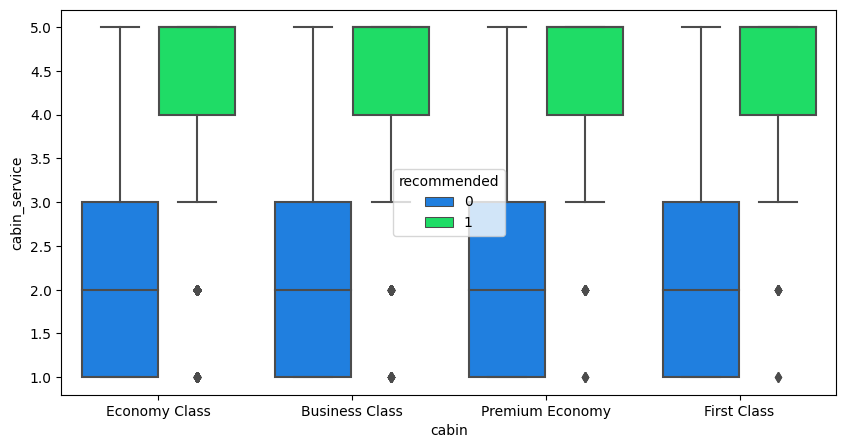

In [ ]:
#Cabin type and cabin service ratings
sns.set_palette('gist_ncar')
plt.figure(figsize=(10,5))
sns.boxplot( x = airline_df.cabin,y =  airline_df.cabin_service, hue = airline_df['recommended'])

* When compared to other classes, people recommend first class the least. 
* Only those who rated 4.0 to 5.0 will make a recommendation.

<Axes: xlabel='cabin', ylabel='overall'>

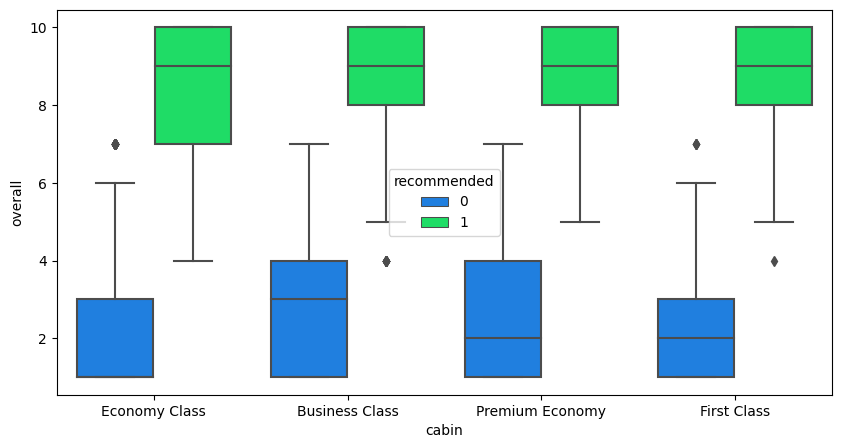

In [ ]:
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10,5))
sns.boxplot(x = airline_df.cabin, y = airline_df.overall, hue = airline_df['recommended'])

* The overall rating for the 'Economy class' cabin type is favourable. As a result, it is recommended.
* From above its clear that, Both Business and Premium Economy Class are not recommended.

<Axes: xlabel='cabin', ylabel='value_for_money'>

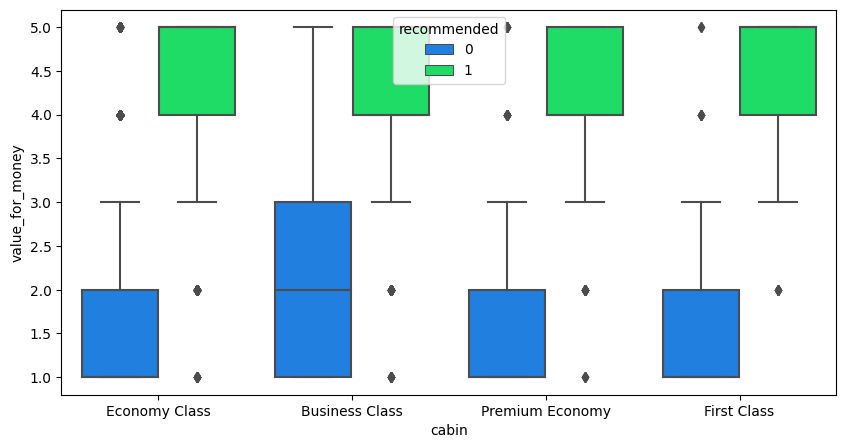

In [ ]:
#Cabin type and value for money ratings (out of 5 )
plt.figure(figsize=(10,5))
sns.boxplot(x = airline_df.cabin, y =  airline_df.value_for_money, hue = airline_df['recommended'])

* Only those people who have given the 'value for money' rating of 4 or higher have been recommended to others.
* It is clear from the above that business class travel is not recommended because it is not worth of money.

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

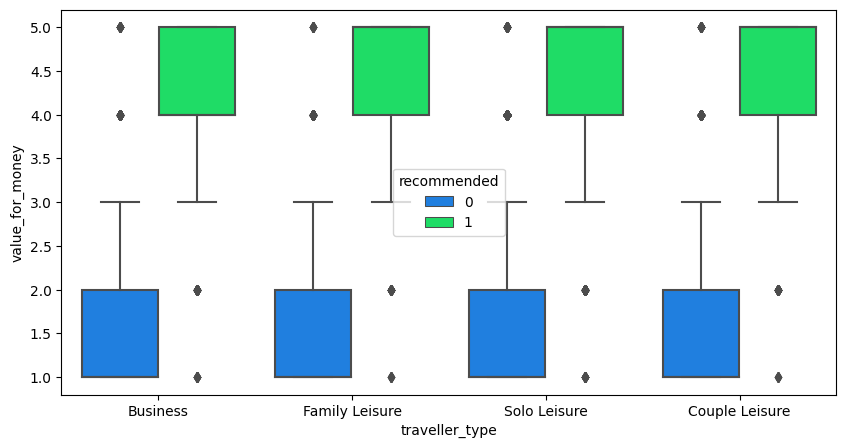

In [ ]:
#Traveller type and value for money ratings (out of 5 )
plt.figure(figsize=(10,5))
sns.boxplot(x = airline_df.traveller_type, y = airline_df.value_for_money, hue = airline_df['recommended'])

* As we can see from the graph above, all type of traveller type is highly advised if the value for money rating is greater than 4.
* If the rating of value of money is below 2, all the traveller type is not recommended.

In [ ]:
# Features present in dataset
features= airline_df.columns
features

Index(['airline', 'overall', 'review_date', 'customer_review',
       'traveller_type', 'cabin', 'route', 'seat_comfort', 'cabin_service',
       'food_bev', 'entertainment', 'ground_service', 'value_for_money',
       'recommended'],
      dtype='object')

In [ ]:
airline_df.select_dtypes(include=object).columns.tolist()

['airline',
 'review_date',
 'customer_review',
 'traveller_type',
 'cabin',
 'route']

In [ ]:
features_1= features.drop(['airline','review_date', 'customer_review','route','recommended'])

overall


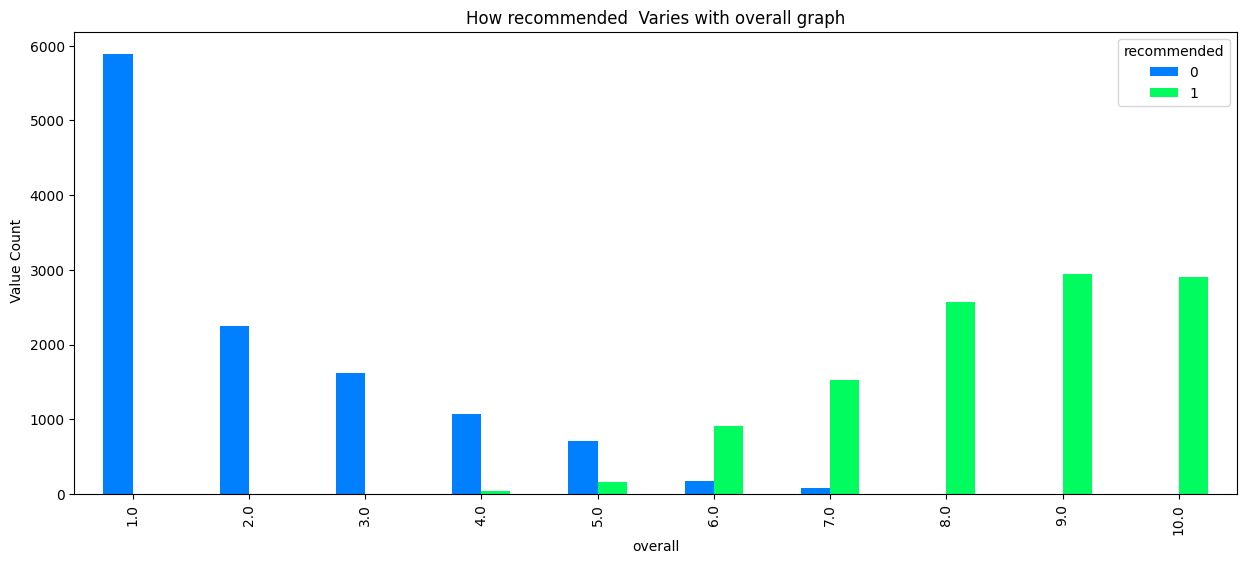

traveller_type


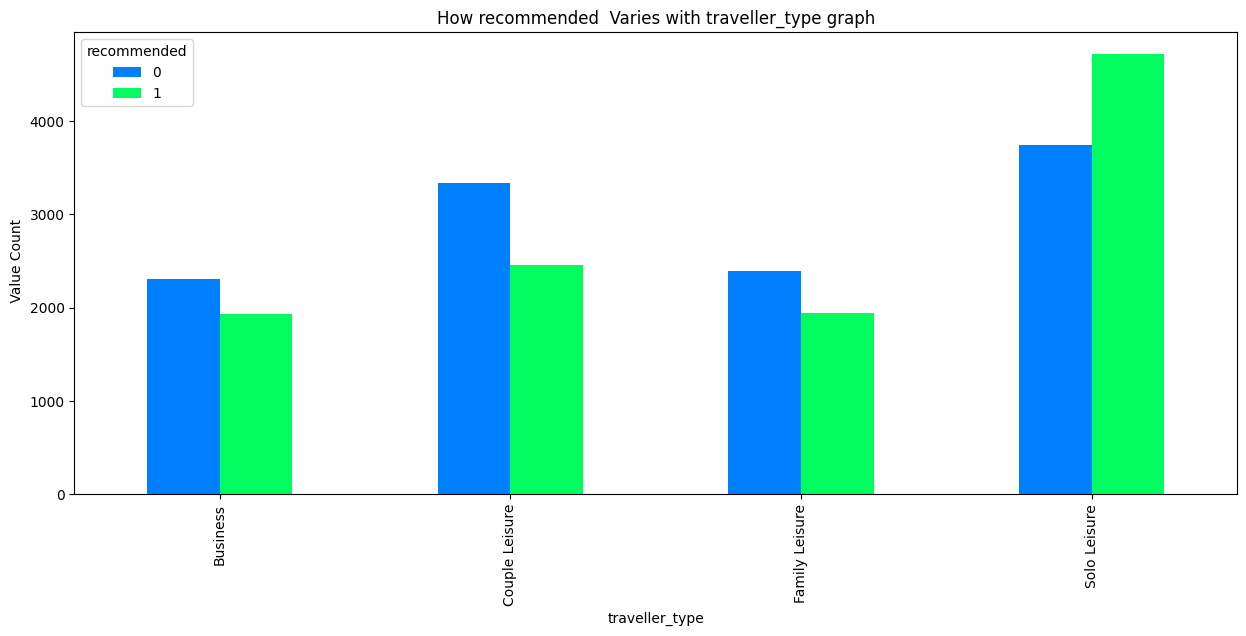

cabin


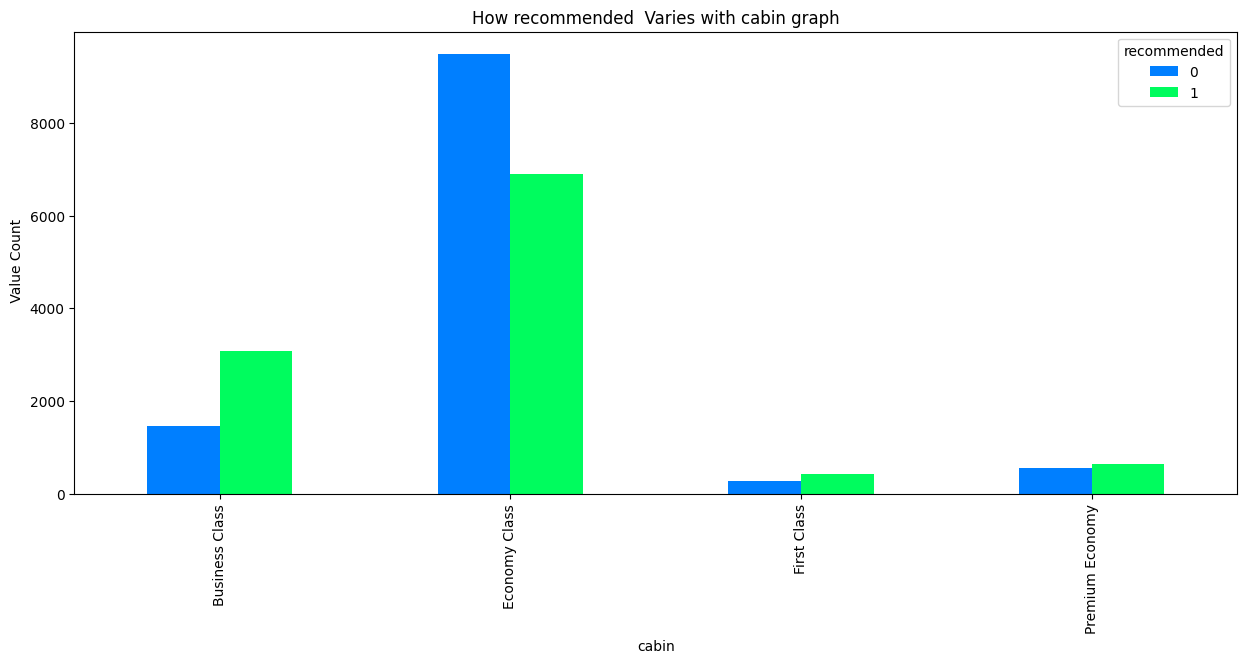

seat_comfort


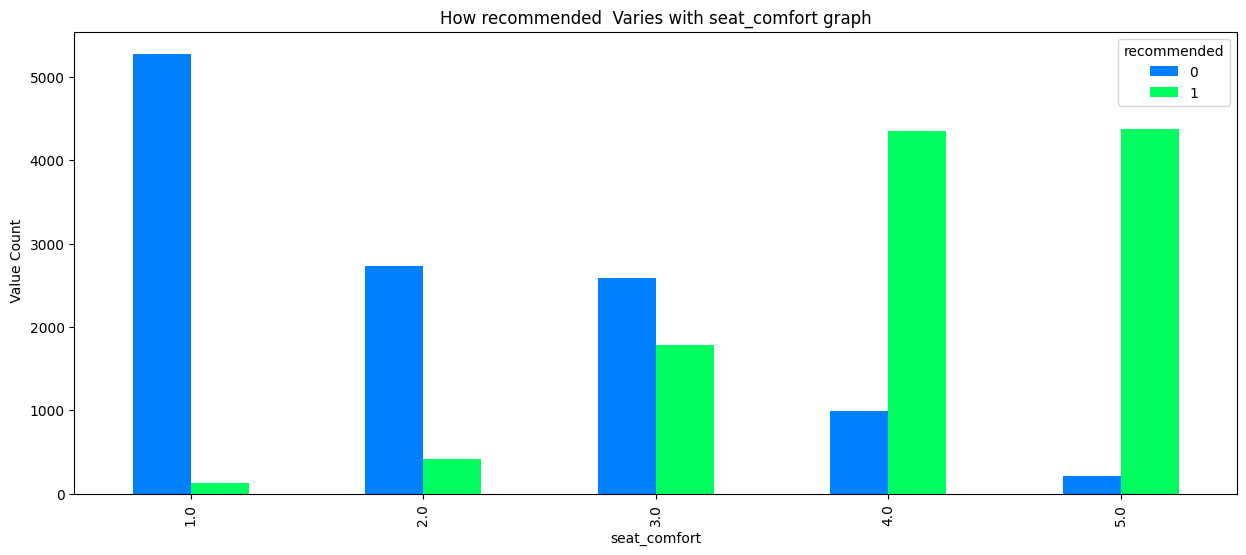

cabin_service


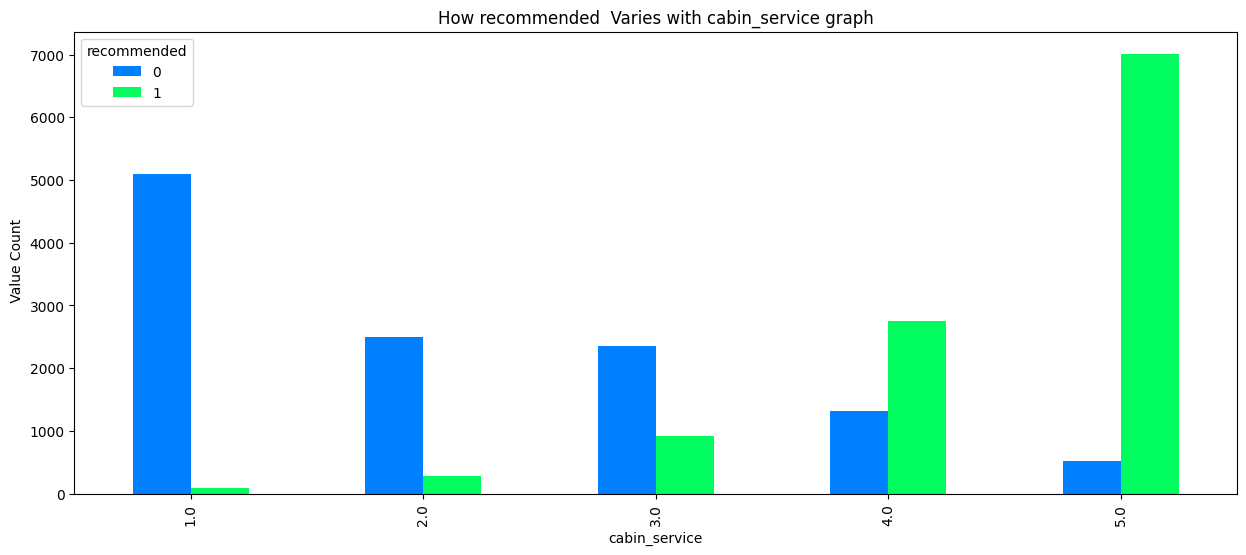

food_bev


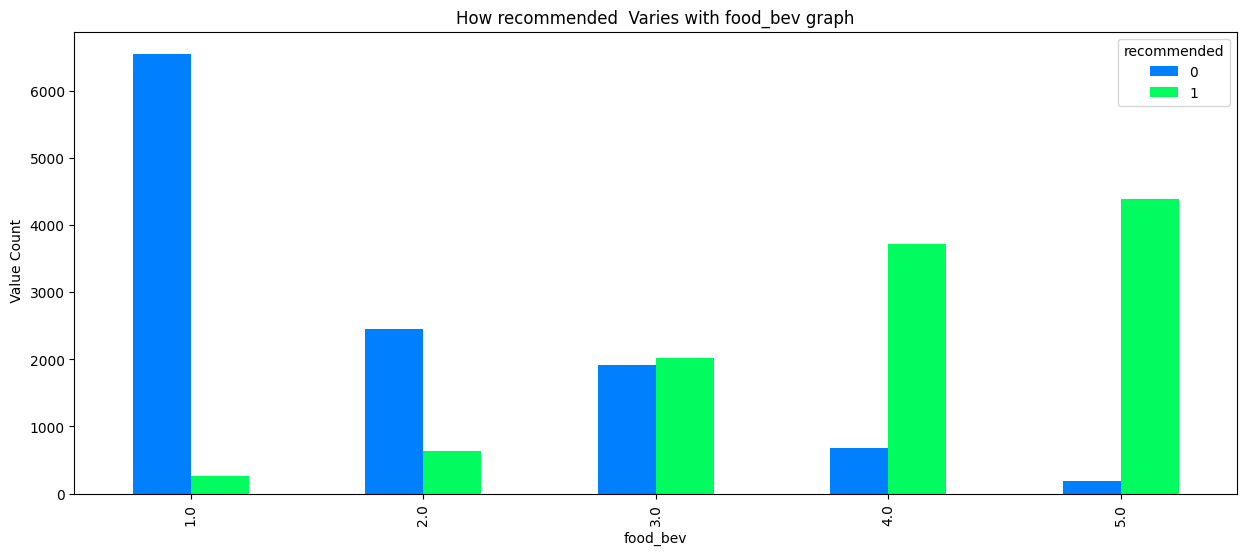

entertainment


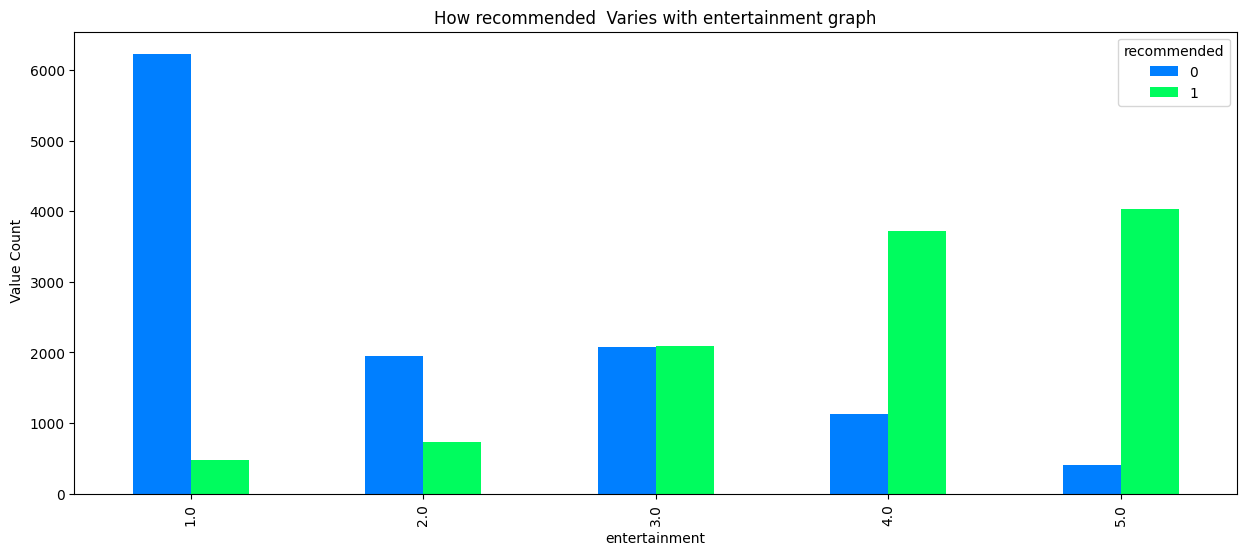

ground_service


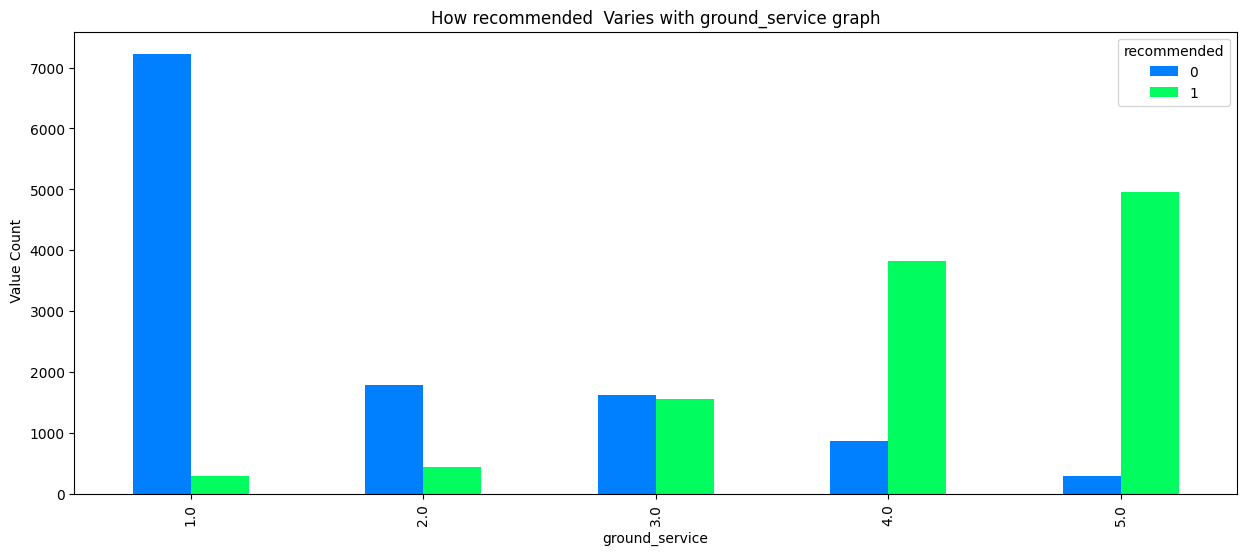

value_for_money


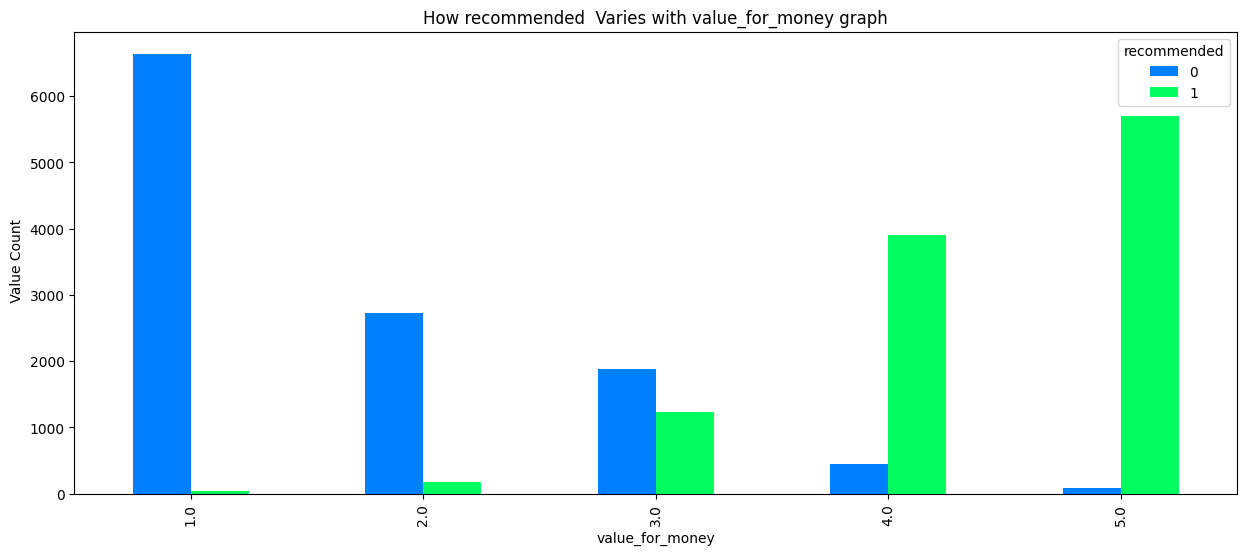

In [ ]:
# Ploting graph of count of feature grouped by target variable 
for feature in features_1:
  print(feature)
  airline_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()

* We can conclude following things from above:
 *  We can see that people have given both 1 or 0 which we will consider from now on as positive and negative recomendation so to interpret it effectively to the solo leisure. This may because of the poor infrastructure or the service recieved by the people and positive recommedation may be because of low price for solo. But this is approximate analysis based on the data provided.
 * Also we can see that people gives the high positive recommendation to economic class in cabin. From this we can conclude that people love to travel in economic class as of low price also in same way we can see people give highest negative recomendation to economy class maybe because less infrastrure or service provided to them. Also we can see people have given higest positive recommedation to Business class it may be because of the quality of service provided to them in Business class and simmilarly negative recoomendation because of high price of business class or less travelling percentage.
 * From month vs no. of recommendation. We can see that people tents to travel most in the month of July considering the total of positive and negative recommendation combined.
 * From overall vs recommended graph we can see which is perfectly understandable that negative recommendation has been given to the overall rating of 1.0 and high positive recommendation has been given to the overall rating of 10. But it is very true that highest negative recommendation has been given to overall rating of 1.0 which is really a matter of concern.
 * In seat comfort people has given highest positive recommended to the seat of class 5 as compared to very low negative recommendation to the same. Also we can see seat of class 1 have been given highest negative recommendation as compare to its positive recommendation. Here we come to a conclusion it must be removed as early as possible.
 * In cabin service rating people has given highest recommendation to rating to cabin service rating 5 as compare to its counterpart. From this we can conclude that cabin service is doing pretty good.
 * In food and beverage rating people have given highest negative recommendation to rating 1.0 from this we can conclude that airline service has to improve their food delivery and quality service.
 * In entertainment also we can see most people has given highest negative recommendation to entertaiment rating 1 which shows that airline has to improve their entertainment system as well.
 * In ground service also we can see most people has given highest negative recommendation to ground service rating 1 which shows that airline has to improve their ground service.
 * In value for money also we can see most people has given highest negative recommendation to value for money rating 1 which shows that airline has to make their flight service more cost effective.

*As we can see above, the overall ratings column is a direct result of all of the other review columns. It means that the overall ratings increase with the increase in the other ratings.*

<Axes: xlabel='recommended', ylabel='count'>

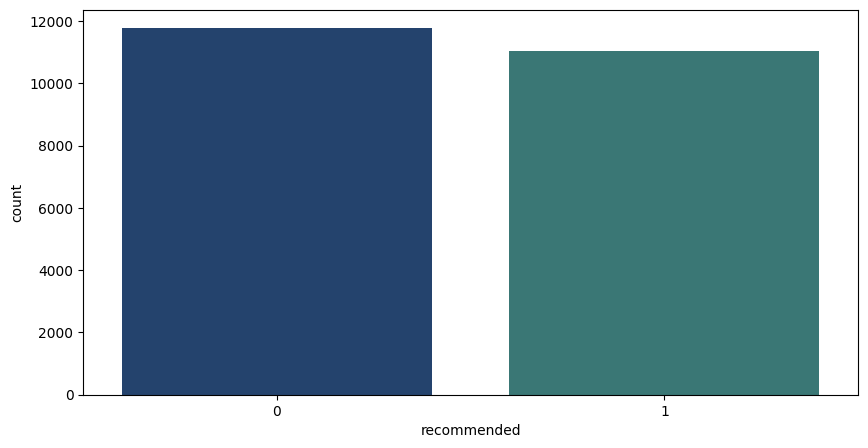

In [ ]:
#Visualizing the recommendation count
sns.set_palette('gist_earth')
plt.figure(figsize=(10,5))
sns.countplot(x = 'recommended', data = airline_df)

* According to the graph above, even though not recommended is higher, the difference between recommended and not recommended is not significantly higher.
* Over 11000 people have recommended it to others.

<Axes: xlabel='traveller_type', ylabel='count'>

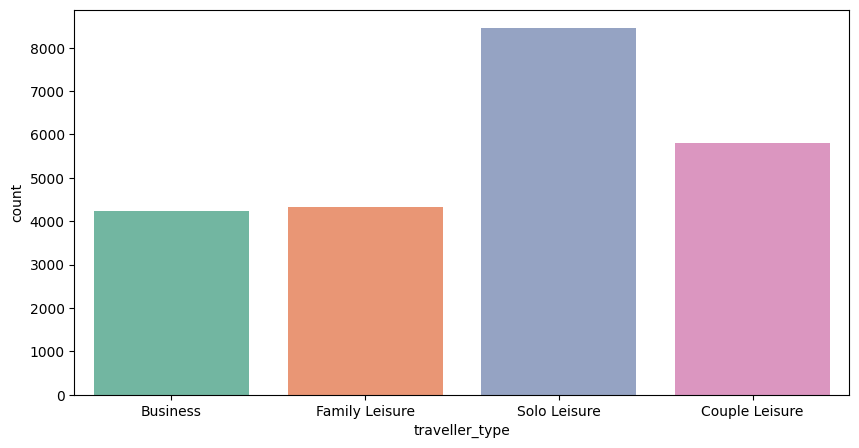

In [ ]:
#Count of each type of travellers
sns.set_palette('Set2')
plt.figure(figsize=(10,5))
sns.countplot(x = 'traveller_type', data = airline_df)

* The majority of reviewers are solo leisure travellers, followed by couple leisure travellers. Both business and leisure travellers have few but equal reviews.
* *As a result, the majority of travellers are Solo Leisure.*

<Axes: ylabel='cabin'>

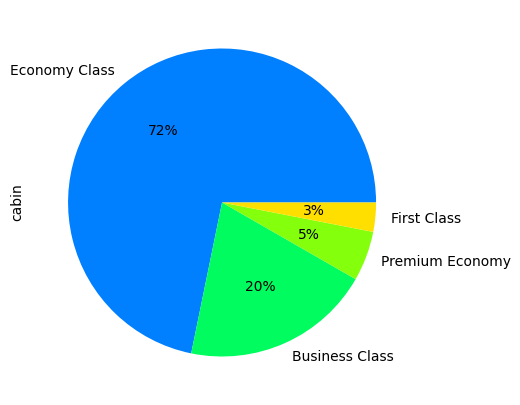

In [ ]:
# Get the number of passengers for each cabin class through pie chart visualization
sns.set_palette('gist_ncar')
airline_df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,5))

*  The majority of reviewers are from the Economy Class cabin type.
*  The number of first-class cabin type reviewers is the least.

Text(0.5, 1.0, 'Airline Count Distribution')

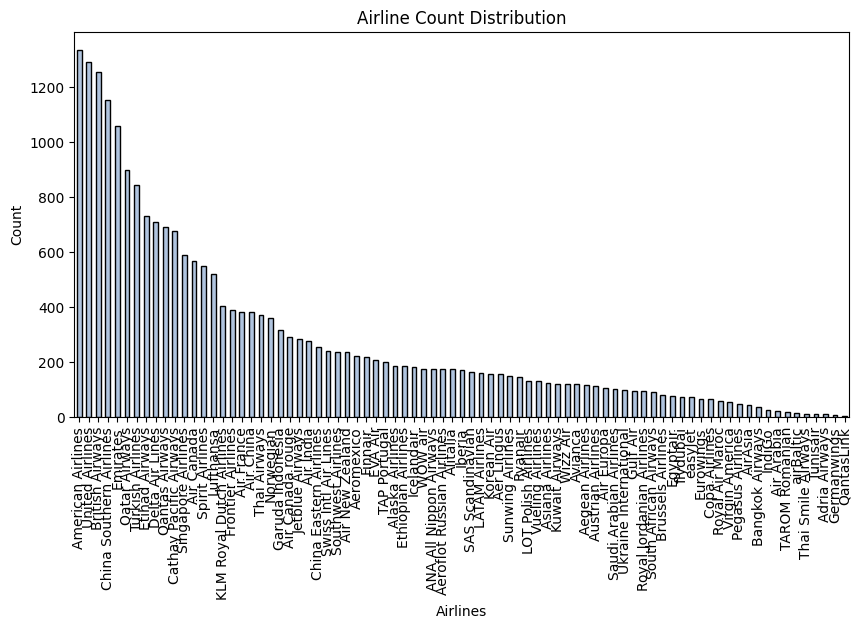

In [ ]:
#Checking the reviews distribution with respect to the airlines
plt.figure(figsize=(10,5))
airline_df['airline'].value_counts().plot(kind="bar", align='center',color = 'lightsteelblue',edgecolor = 'black')
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.title("Airline Count Distribution")

* American Airlines get most reviews followed by united Airlines and British Airways.
* Qantaslink get least reviews followed by Germanwings and Andria Airways.

Let's check the top 10 airlines with most reviews :

Text(0.5, 1.0, 'Airline Count Distribution')

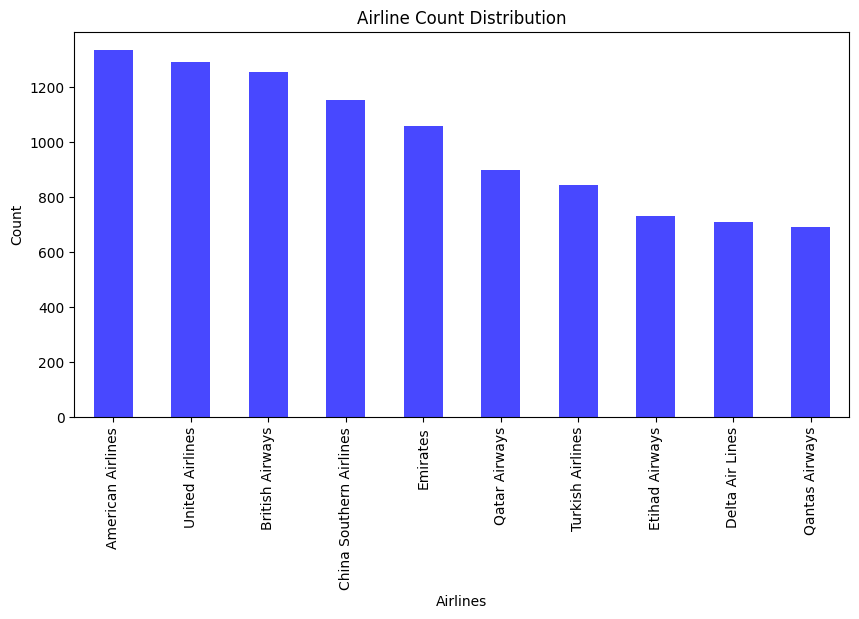

In [ ]:
# Checking the reviews distribution with respect to the top 10 airlines with most number of reviews
plt.figure(figsize=(10,5))
sns.set_palette("bwr")
airline_df['airline'].value_counts().nlargest(10).plot(kind="bar")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.title("Airline Count Distribution")

Let's check the bottom 10 airlines with Least reviews :

Text(0.5, 1.0, 'Airline Count Distribution')

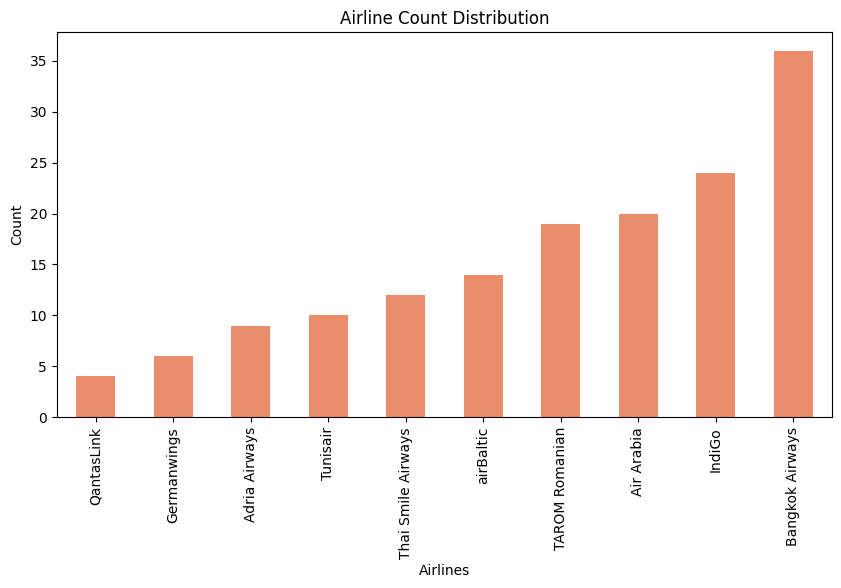

In [ ]:
# checking the reviews distribution with respect to the top airlines with least number of reviews
plt.figure(figsize=(10,5))
sns.set_palette("flare")
airline_df['airline'].value_counts().nsmallest(10).plot(kind="bar")
plt.xlabel("Airlines")
plt.ylabel("Count")
plt.title("Airline Count Distribution")

Text(0.5, 1.0, 'Traveller Type Count Distribution')

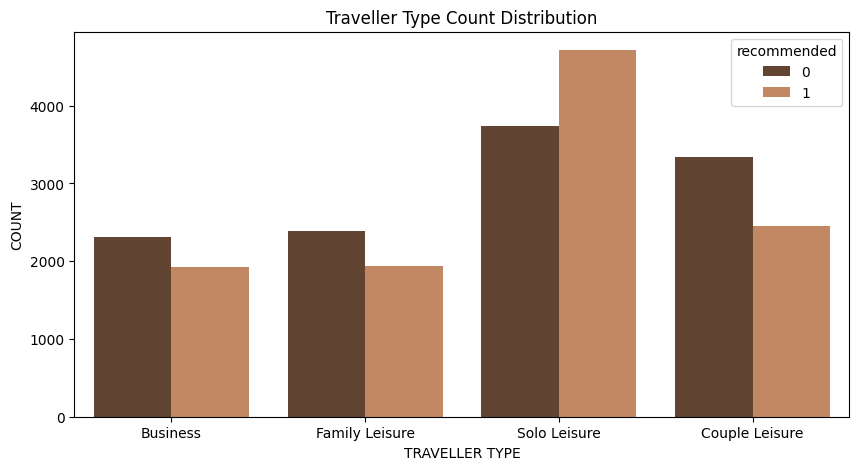

In [ ]:
# Traveller Type Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="traveller_type", hue="recommended", data=airline_df, palette="copper")
plt.xlabel("TRAVELLER TYPE")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.title("Traveller Type Count Distribution")

Text(0.5, 1.0, 'Cabin Type Count Distribution')

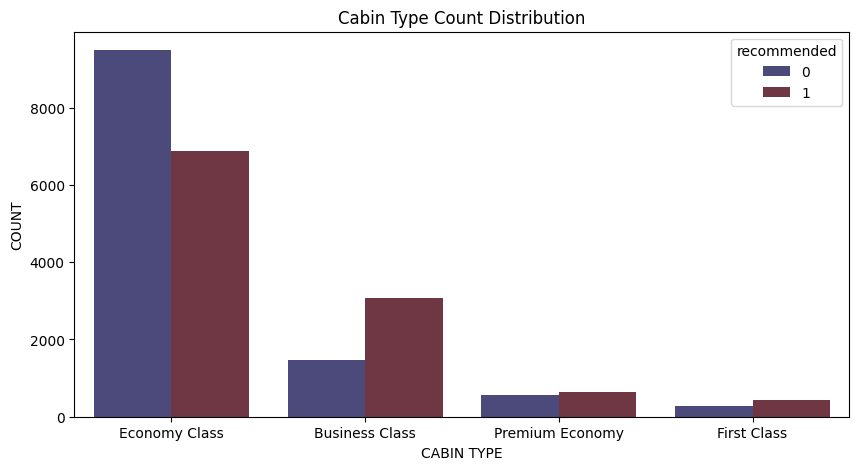

In [ ]:
# Cabin Type Count Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="cabin", hue="recommended", data=airline_df, palette="icefire")
plt.xlabel("CABIN TYPE")
plt.ylabel("COUNT")
plt.xticks(rotation=0)
plt.title("Cabin Type Count Distribution")

<Axes: xlabel='overall', ylabel='Density'>

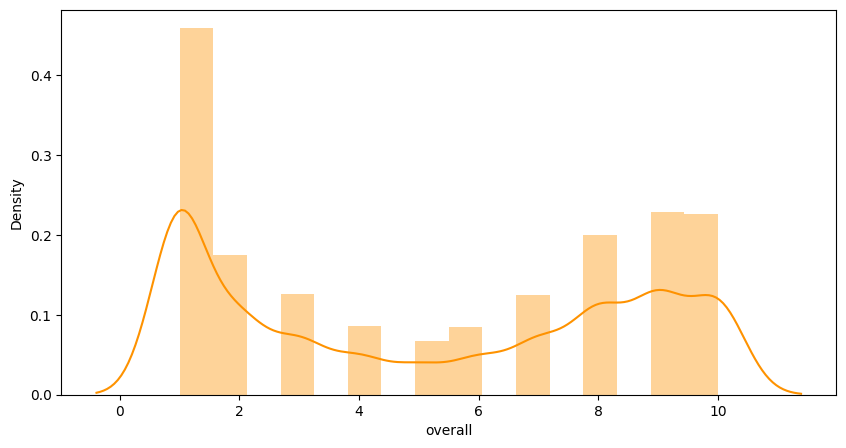

In [ ]:
# Checking the density of the overall reviews
plt.figure(figsize=(10,5))
sns.set_palette("Wistia_r")
sns.distplot(airline_df['overall'])

In [ ]:
# Grouping the various ratings columns to one list
review_columns = ['overall','seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']

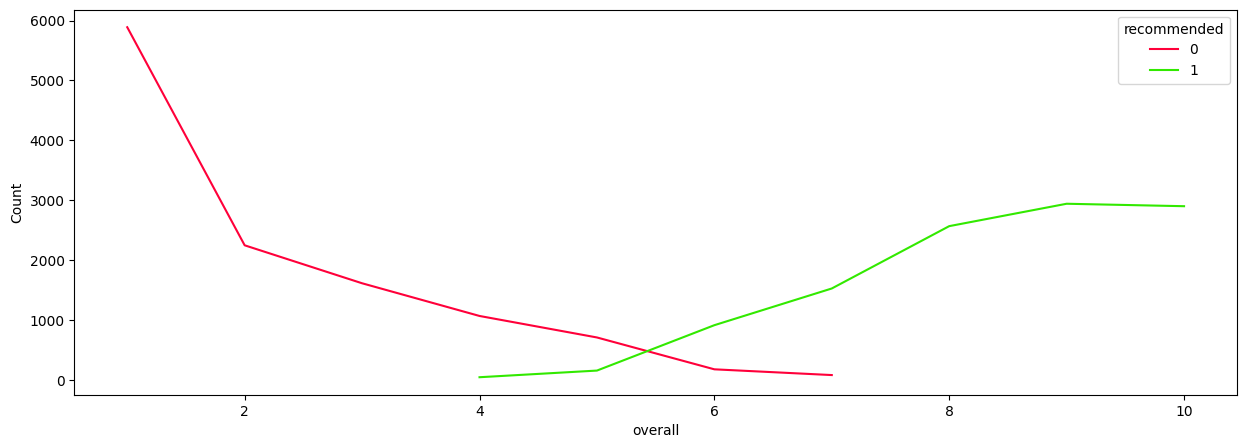

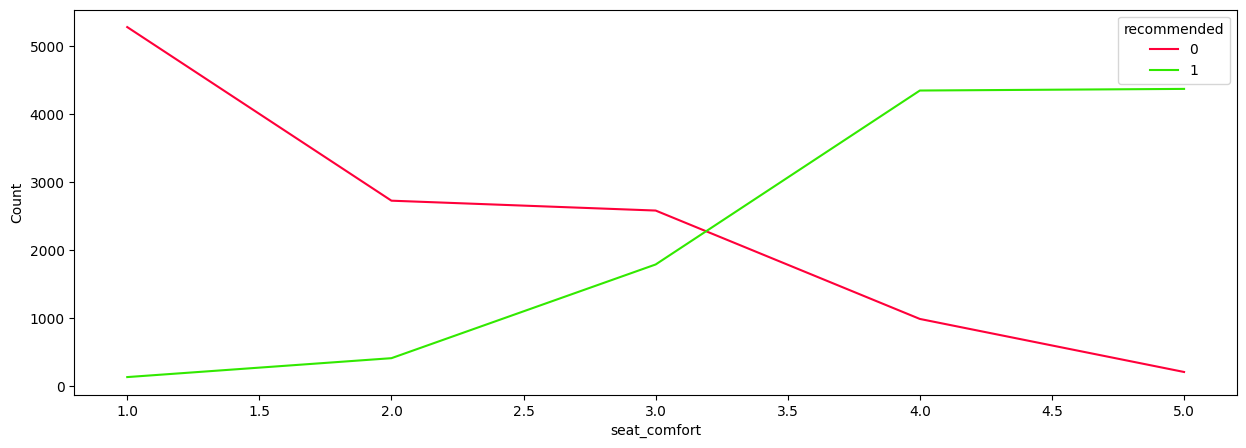

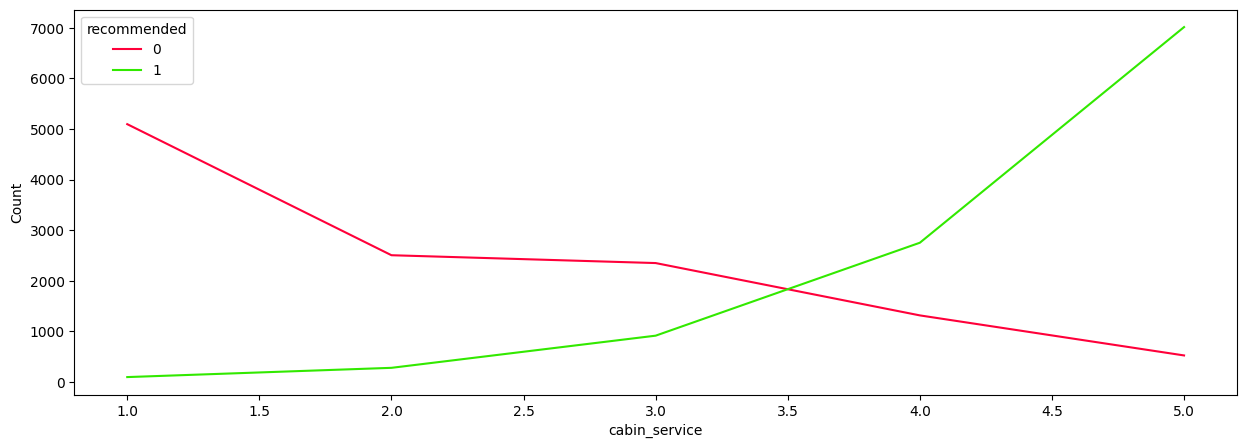

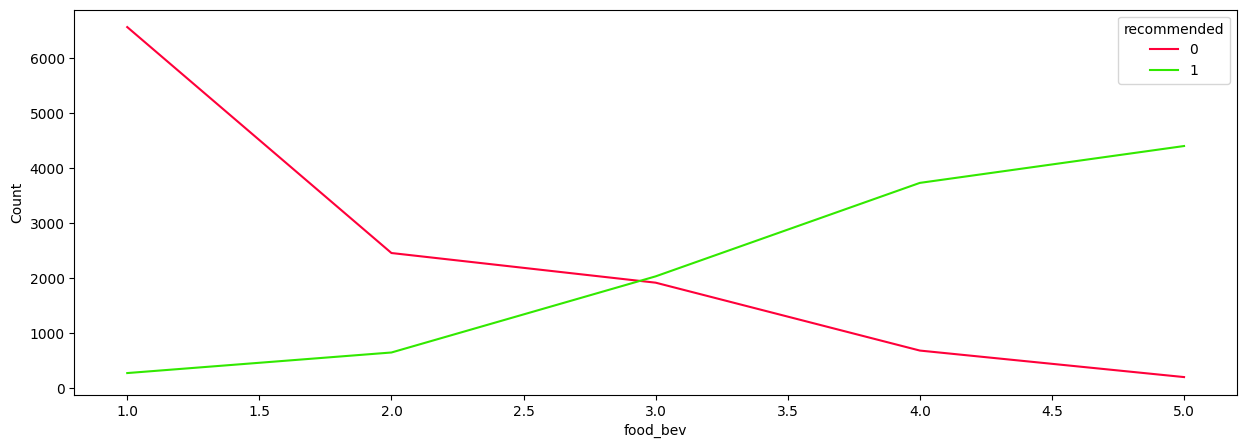

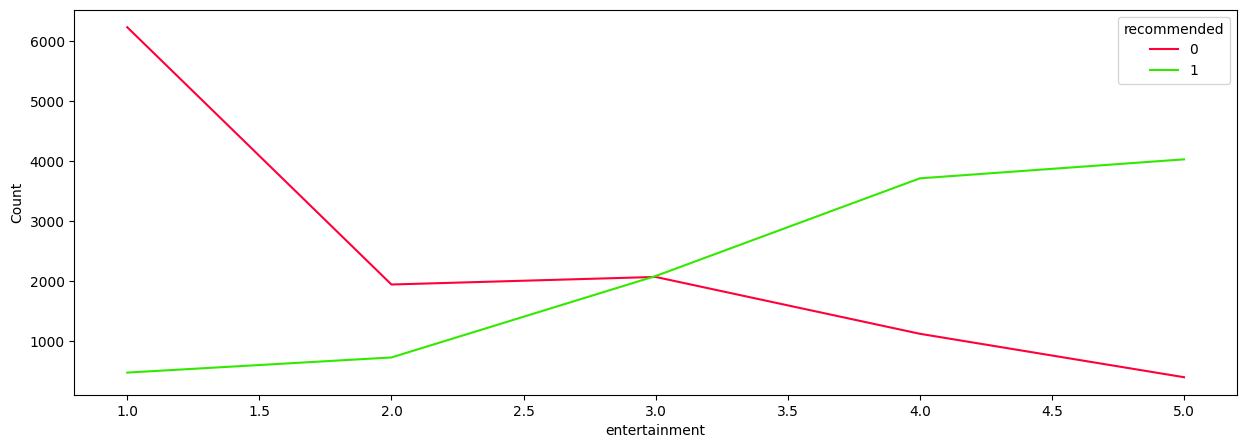

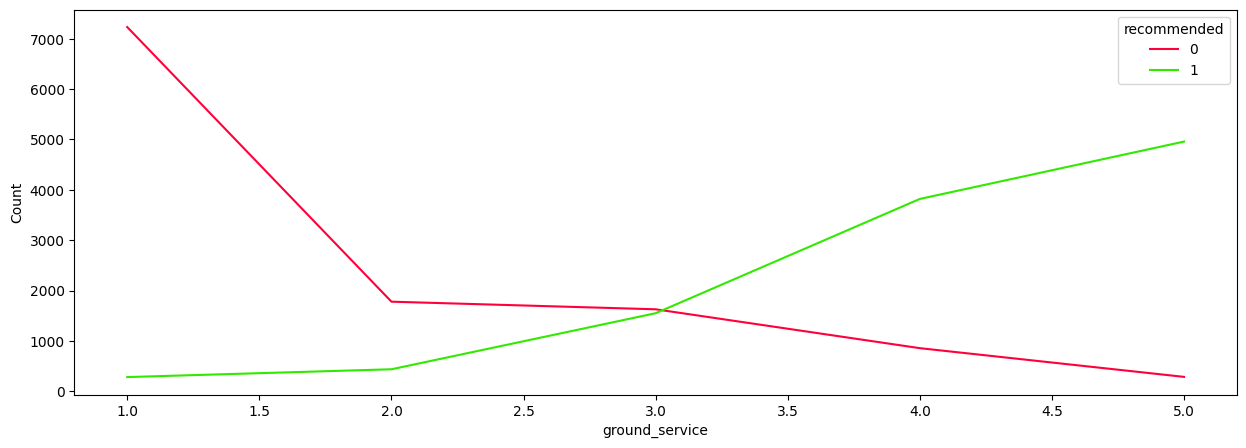

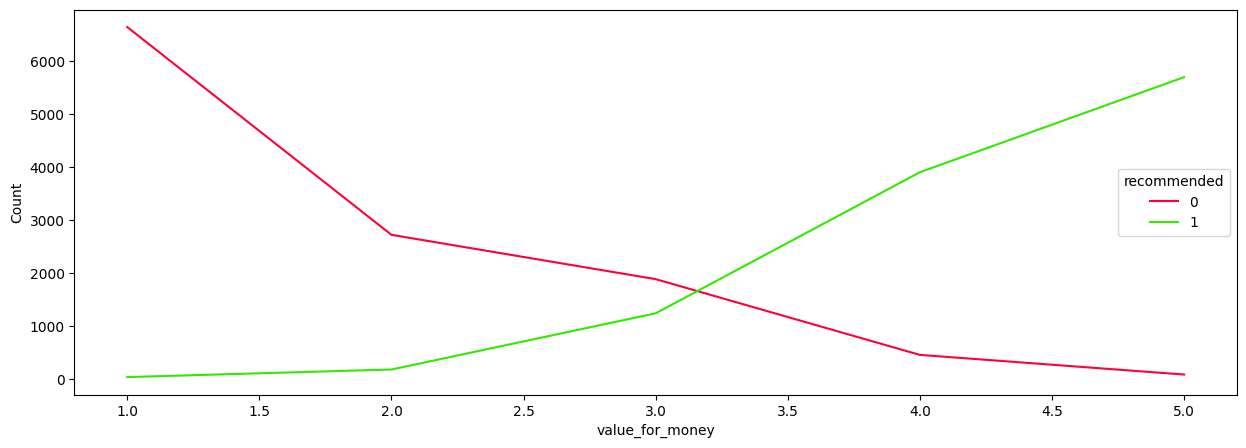

In [ ]:
# Understanding the relationship of the various kinds of ratings with the overall ratings using a loop
for i in review_columns:
  count_rec = airline_df.groupby([i,'recommended'])[['recommended']].count()
  count_rec.columns = ['Count']
  count_rec = count_rec.reset_index()
  plt.figure(figsize=(15,5))
  sns.lineplot(x=i, y='Count', hue='recommended', data=count_rec ,palette='prism_r')


The above plot shows the direct dependency of all type of ratings and the recommendation status. As the overall rating increases, there's more chance of recommendation. As the overall rating decreases decrease, there's less chance of recommendations.



### **NLP for User Reviews/ Sentiment Analysis:**

In [ ]:
#Install VaderSentiment package for sentiment analysis:
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing SentimentIntensityAnalyzer class
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
#creating function to get sentiment score for review
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
  
    #scorring each reviews depending on their polarity
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return  sentiment_dict['compound']

In [ ]:
# creating numeric review column to store polarity for each customer review
airline_df['numeric_review']= airline_df['customer_review'].apply(sentiment_scores)

In [ ]:
# checking the full text of customer reviews randmomly
airline_df.iloc[23,:]['customer_review']

'âœ… Trip Verified | Atlanta to Amman via Istanbul. Beside being one of the filthiest airport bathrooms and cheap of course for not making it easy to use the Wi-Fi, they make us wait 5 more hours in the transit just because they can fill up the plane by merging another plane for people who are going to Amman without giving us any notice! And after waiting hours now to check-in online, now they saying check-in at the counter. Bad food on the plane, bad select of movies and entertainments and of course bad customer service in the airport.'

In [ ]:
#comparing the customer review with the generated numeric review
airline_df.iloc[23,:]['numeric_review']

-0.8986

In [ ]:
# checking the full text of customer reviews randmomly
airline_df.iloc[100,:]['customer_review']

'âœ… Trip Verified | Frankfurt to Ankara. Checked in well in advance as I was connecting from an overseas flight. The agent had difficulty locating my reservation despite having been presented with an electronic boarding pass and my passport. At the gate, boarded with the priority group given my status on Star Alliance. On board, the hard product looked good and with the exception of my audio jack the seat functions worked well. Following take off we were offered lunch with two options for main course. The food was tasty for economy class and the portions were OK. Several beverage choices including beer, wine and spirits were offered. The IFE had a glitch where every movie choice was directed to the wrong film each time. The seat was comfortable enough for economy. The flight pushed back and landed on time. I have taken multiple international and domestic flights with TK in recent years and as with my previous flights, this one had passengers standing up and walking to the front of the

In [ ]:
#comparing the customer review with the generated numeric review
airline_df.iloc[100,:]['numeric_review']

0.7951

*We can clearly see from the above example that our numeric_review column explains the user sentiment from the customer_reviews column very accurately we can drop the customer review because we won't need it any further*

In [ ]:
airline_df["Overall Review Sentiment"] = np.where(airline_df["numeric_review"] >= 0.5,"Positive",
                                                       np.where(airline_df["numeric_review"] <= -0.5,"Negative","Neutral"))

<Axes: xlabel='Overall Review Sentiment', ylabel='count'>

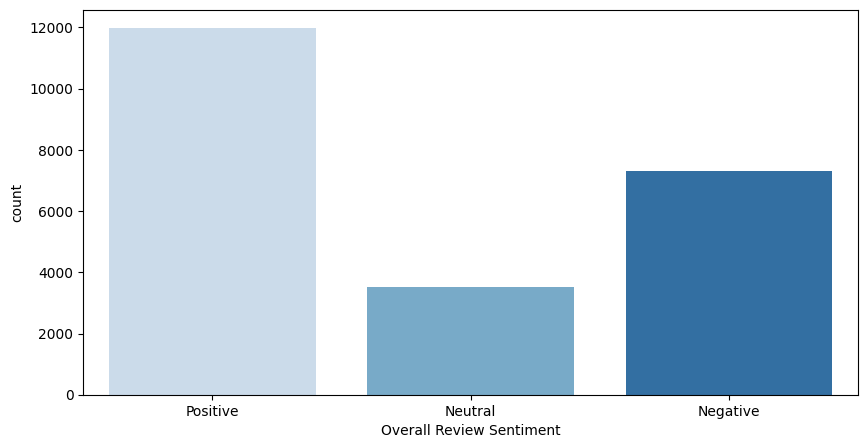

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Overall Review Sentiment', data = airline_df, palette="Blues")

*The above graph shows that customers have mostly positive Sentiment about the airline.*

# **FEATURE SELECTION:**

<Axes: >

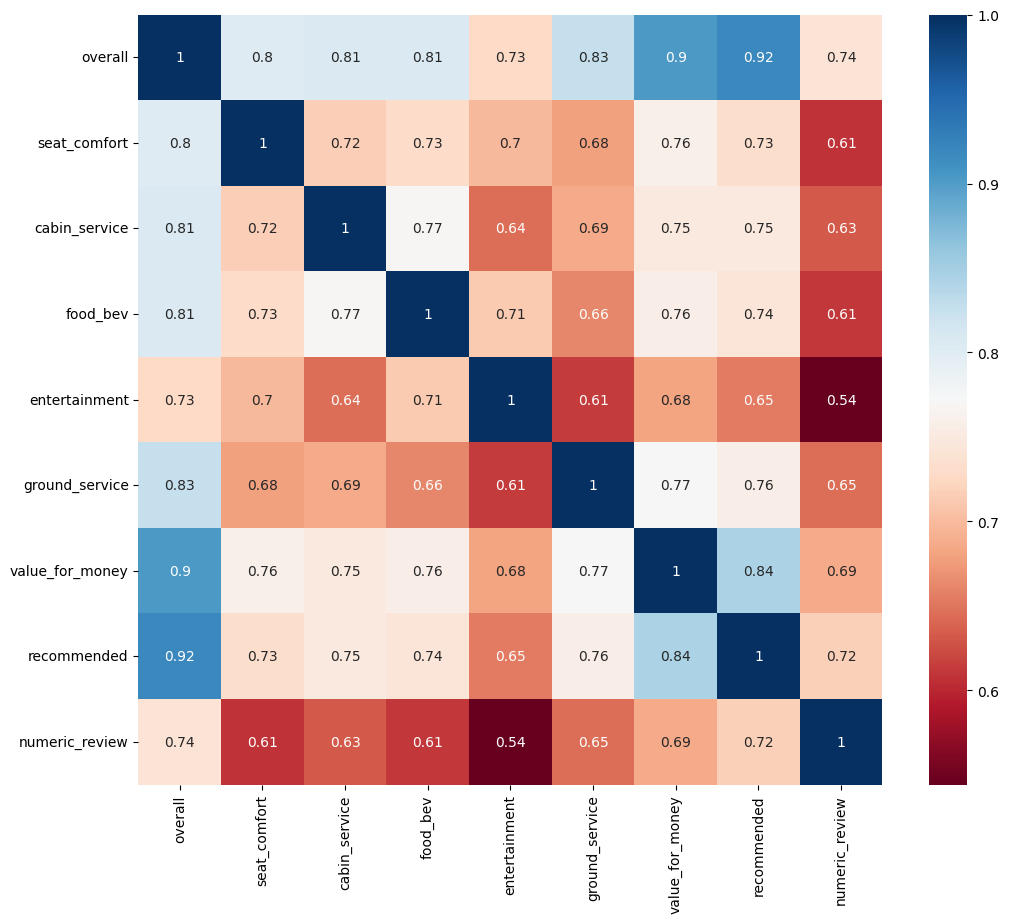

In [ ]:
#Heatmap with correlation details
plt.figure(figsize=(12,10))
sns.heatmap(airline_df.corr(), annot=True, cmap='RdBu')

In [ ]:
airline_df.columns

Index(['airline', 'overall', 'review_date', 'customer_review',
       'traveller_type', 'cabin', 'route', 'seat_comfort', 'cabin_service',
       'food_bev', 'entertainment', 'ground_service', 'value_for_money',
       'recommended', 'numeric_review', 'Overall Review Sentiment'],
      dtype='object')

In [ ]:
airline_df.drop(["customer_review","review_date",'route','Overall Review Sentiment'],axis = 1,inplace = True)

In [ ]:
# categorical features to do one hot encoding
categorical_columns =['airline','cabin','traveller_type']
     

airline_df= pd.get_dummies(airline_df,columns=categorical_columns , drop_first = False)

Added new Categorical columns. Now Let's check the List of columns :

In [ ]:
airline_df.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'numeric_review',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air 

# **MODEL IMPLEMENTATION:**

 *Split into train and test:*

In [ ]:
# Create the independent variable data
X = airline_df.drop(['recommended'],axis=1)


# Create the dependent variable data
y = airline_df['recommended']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 23)

In [ ]:
#Checking the test and train sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17119, 97)
(17119,)
(5707, 97)
(5707,)


In [ ]:
# del metrics_df

In [ ]:
# Declaring a dataset for storing the evaluation metrics for each of the models
column_names = ["MODEL NAME", "ACCURACY", "RECALL","PRECISION","F1-SCORE","ROC AUC SCORE"]
metrics_df = pd.DataFrame(columns = column_names) 

In [ ]:
#creating function for storing evaluation metrices
def add_metrics_details(model_name,y_test,y_pred,df):
  df = df.append({'MODEL NAME': model_name, 
                  'ACCURACY':accuracy_score(y_test, y_pred), 
                  'RECALL': recall_score(y_test, y_pred),
                  'PRECISION':precision_score(y_test, y_pred),
                  'F1-SCORE':f1_score(y_test, y_pred,)
                  ,'ROC AUC SCORE':roc_auc_score(y_test, y_pred)
                  }
                  ,ignore_index=True)
  return df

In [ ]:
metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE,ROC AUC SCORE


### **LOGISTIC REGRESSION:**

In [ ]:
# defining logistic regression
lr= LogisticRegression()
# fit the train model
lr.fit(X_train, y_train)
# logistic regression score 
score=lr.score(X_test,y_test)
print(f'Logistic regression score : {score}')

Logistic regression score : 0.9800245312773787


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2951
           1       0.98      0.98      0.98      2756

    accuracy                           0.98      5707
   macro avg       0.98      0.98      0.98      5707
weighted avg       0.98      0.98      0.98      5707

Accuracy of the Model: 98.00245312773787%



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Model')

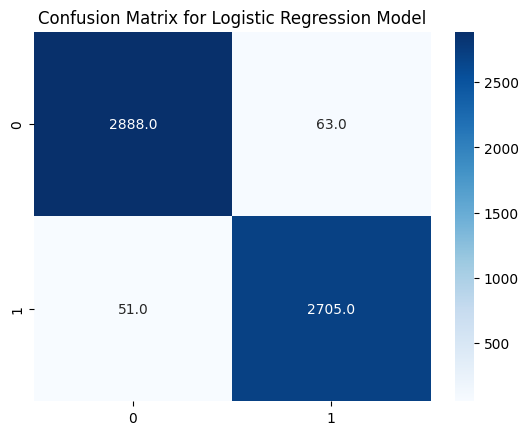

In [ ]:
#Evaluation of the logistic regression model
predicted = lr.predict(X_test)
# printing precision, Recall, f1-score
print(classification_report(y_test, predicted))
# Confusion matrix
cm = metrics.confusion_matrix( y_test,predicted)
# Printing Accuracy of the model
print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
# Plotting Confusion matrix Heatmap using sns
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression Model")


In [ ]:
# Using function to add the result in metrics_df
metrics_df=add_metrics_details("Logistic Regression",y_test,predicted,metrics_df)

### **DECISION TREE:**

In [ ]:
# Defining Decision Tree
dtc =DecisionTreeClassifier()
# Fitting the train model
dtc.fit(X_train,y_train)
# Decision tree Score 
score=dtc.score(X_test,y_test)
print(f'Decision Tree score : {score}')

Decision Tree score : 0.9647800946206413


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2951
           1       0.98      0.98      0.98      2756

    accuracy                           0.98      5707
   macro avg       0.98      0.98      0.98      5707
weighted avg       0.98      0.98      0.98      5707

Accuracy of the Model: 98.00245312773787%



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree  Model')

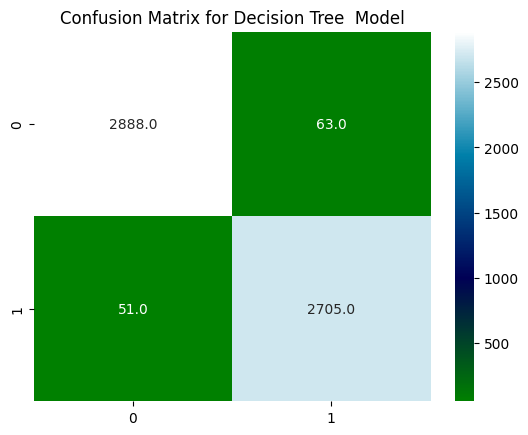

In [ ]:
#Evaluation of the model
y_pred = dtc.predict(X_test)
# printing precision, Recall, f1-score
print(classification_report(y_test, predicted))
# Confusion matrix
cm = metrics.confusion_matrix( y_test,predicted)
# Printing Accuracy of the model
print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
# Plotting Confusion matrix Heatmap using sns
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="ocean")
plt.title("Confusion Matrix for Decision Tree  Model")

In [ ]:
# Using function to add the result in metrics_df
metrics_df=add_metrics_details("Decision Tree",y_test,predicted,metrics_df)

### **XGBOOST MODEL:**

In [ ]:
# Importing 
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb.score(X_test, y_test)

0.9773961801296653

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2951
           1       0.97      0.98      0.98      2756

    accuracy                           0.98      5707
   macro avg       0.98      0.98      0.98      5707
weighted avg       0.98      0.98      0.98      5707

Accuracy of the Model: 97.73961801296653%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost  Model')

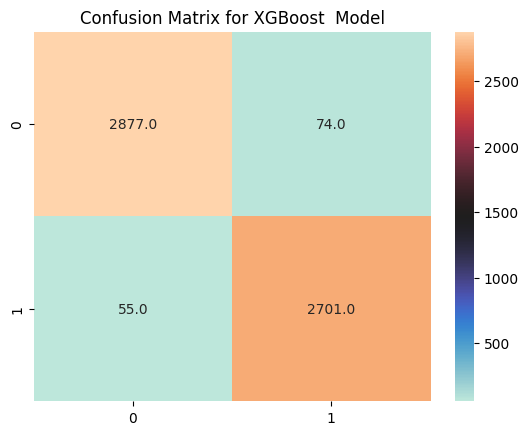

In [ ]:
#Evaluation of the model
predicted = xgb.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test, predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="icefire")
plt.title("Confusion Matrix for XGBoost  Model")

In [ ]:
metrics_df=add_metrics_details("XGBoost",y_test,predicted,metrics_df)

### Finding Important Features

In [ ]:
from xgboost import plot_importance
sorted_idx = np.argsort(xgb.feature_importances_)[::-1]

In [ ]:
for index in sorted_idx:
    print([X_test.columns[index], xgb.feature_importances_[index]])

['overall', 0.8112434]
['airline_Swiss Intl Air Lines', 0.006032598]
['traveller_type_Couple Leisure', 0.005752436]
['airline_United Airlines', 0.0057404633]
['airline_Ethiopian Airlines', 0.0054677776]
['airline_Qatar Airways', 0.0052681887]
['traveller_type_Family Leisure', 0.005151396]
['airline_Turkish Airlines', 0.005101186]
['airline_Finnair', 0.005037294]
['value_for_money', 0.0049878946]
['airline_Etihad Airways', 0.0049720854]
['airline_Icelandair', 0.0048778984]
['entertainment', 0.00442765]
['cabin_Economy Class', 0.0043977587]
['food_bev', 0.0042247847]
['airline_Air China', 0.0041949446]
['airline_China Southern Airlines', 0.004076763]
['cabin_service', 0.0040334123]
['airline_Cathay Pacific Airways', 0.0039775847]
['ground_service', 0.0039442335]
['traveller_type_Business', 0.003902371]
['airline_British Airways', 0.0038466395]
['numeric_review', 0.0038461108]
['airline_Qantas Airways', 0.0038124851]
['traveller_type_Solo Leisure', 0.0038098323]
['seat_comfort', 0.0035938

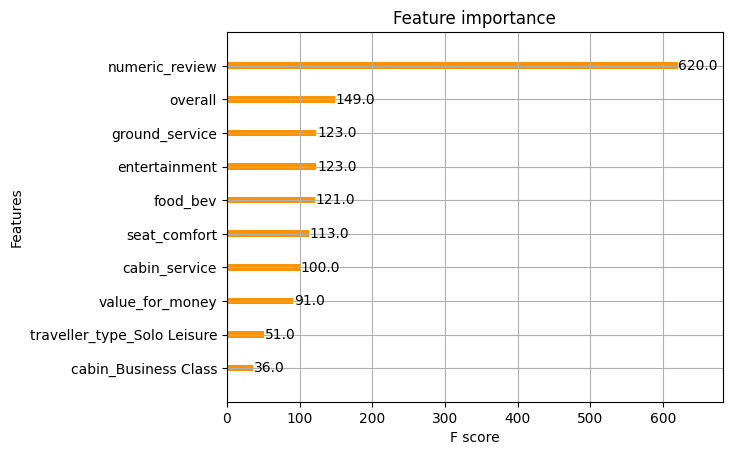

In [ ]:
plot_importance(xgb, max_num_features = 10 )
plt.show()

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm.score(X_test, y_test)

0.9787979674084458

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2951
           1       0.98      0.98      0.98      2756

    accuracy                           0.98      5707
   macro avg       0.98      0.98      0.98      5707
weighted avg       0.98      0.98      0.98      5707

Accuracy of the Model: 97.87979674084458%



Text(0.5, 1.0, 'Confusion Matrix for Light GBM  Model')

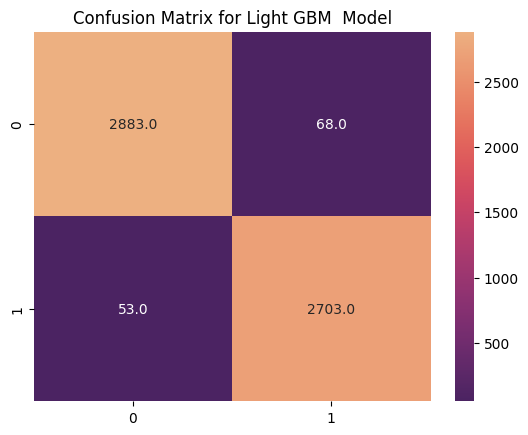

In [ ]:
#Evaluation of the model
predicted = lgbm.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="flare_r")
plt.title("Confusion Matrix for Light GBM  Model")

In [ ]:
metrics_df=add_metrics_details("Light GBM",y_test,predicted,metrics_df)

### **SUPPORT VECTOR MACHINE:**

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9798493078675311

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2951
           1       0.98      0.98      0.98      2756

    accuracy                           0.98      5707
   macro avg       0.98      0.98      0.98      5707
weighted avg       0.98      0.98      0.98      5707

Accuracy of the Model: 97.98493078675311%



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Model')

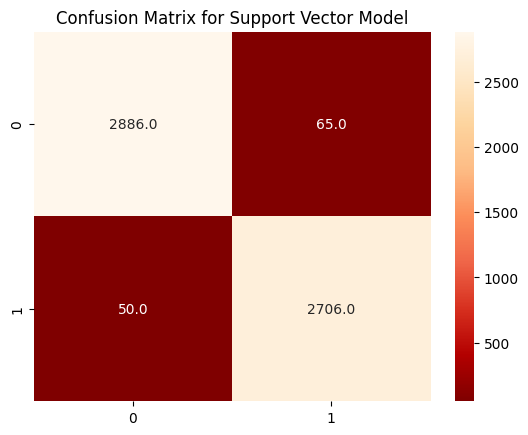

In [ ]:
#Evaluation of the model
predicted = svc.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="OrRd_r")
plt.title("Confusion Matrix for Support Vector Model")

In [ ]:
metrics_df=add_metrics_details("Support Vector Machine",y_test,predicted,metrics_df)

### **RANDOM FOREST:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test, y_test)

0.9803749780970737

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2951
           1       0.98      0.98      0.98      2756

    accuracy                           0.98      5707
   macro avg       0.98      0.98      0.98      5707
weighted avg       0.98      0.98      0.98      5707

Accuracy of the Model: 98.03749780970738%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest  Model')

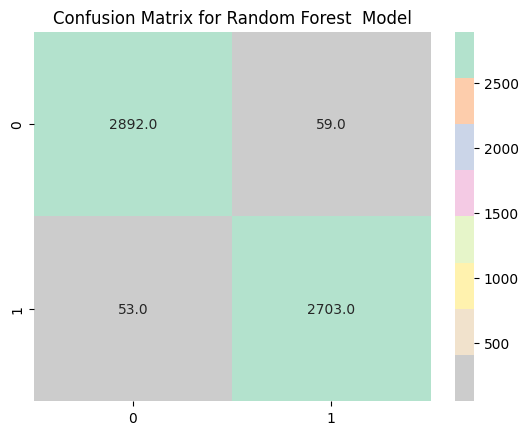

In [ ]:
#Evaluation of the model
predicted = rf.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test, predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Pastel2_r")
plt.title("Confusion Matrix for Random Forest  Model")

In [ ]:
metrics_df=add_metrics_details("Random Forest",y_test,predicted,metrics_df)

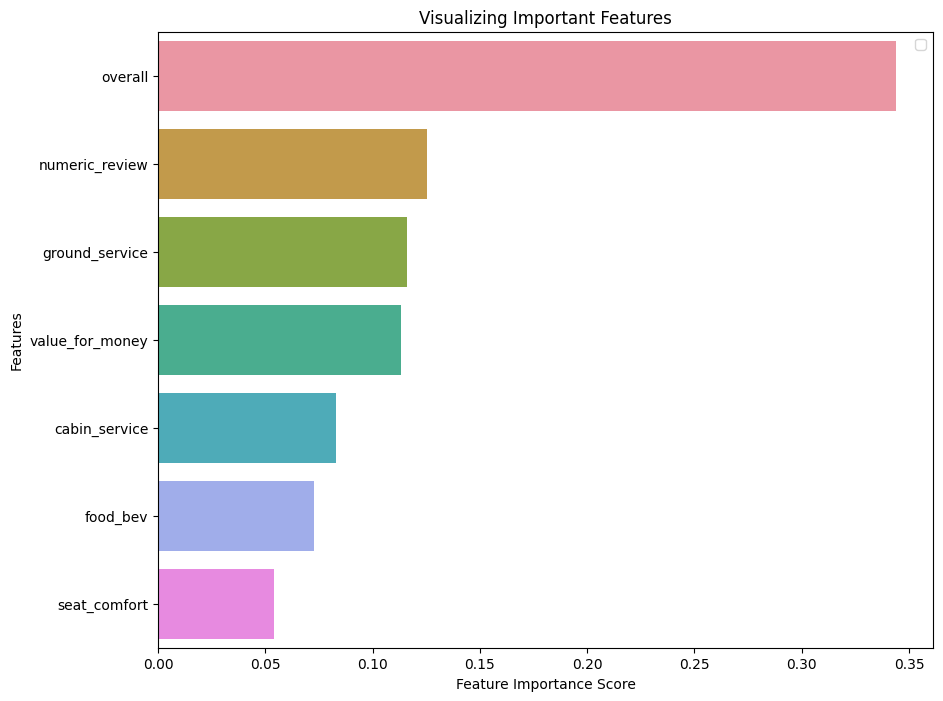

In [ ]:
feature_imp1 = pd.Series(rf.feature_importances_,index=X_test.columns).sort_values(ascending=False)[:7]

plt.figure(figsize=(10,8))

# Creating a bar plot
sns.barplot(x=feature_imp1, y=feature_imp1.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### **K-NEAREST NEIGHBOUR:**

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_test, y_test)

0.9749430523917996

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2951
           1       0.97      0.97      0.97      2756

    accuracy                           0.97      5707
   macro avg       0.97      0.97      0.97      5707
weighted avg       0.97      0.97      0.97      5707

Accuracy of the Model: 97.49430523917995%



Text(0.5, 1.0, 'Confusion Matrix for KNN  Model')

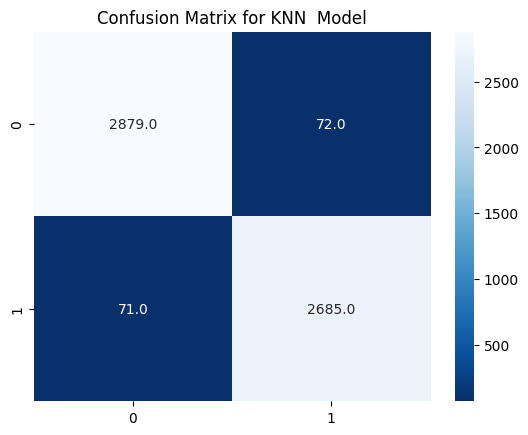

In [ ]:
#Evaluation of the model
predicted = knc.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Blues_r")
plt.title("Confusion Matrix for KNN  Model")

In [ ]:
metrics_df=add_metrics_details("KNN Model",y_test,predicted,metrics_df)

### **XG-BOOST GRIDSEARCH CV:**

In [ ]:
# Hyperparameter Tuning
param_dict = {'n_estimators' : [30,40,50],
              'max_depth' : [5,6,7],
              'learning_rate': [0.1, 0.01, 0.05]}

              # 'min_samples_split' : [10,20],
              # 'min_samples_leaf' : [10,20,30]}
xg_model_gridcv = GridSearchCV(estimator=xgb,
                       param_grid = param_dict,
                       cv = 5, verbose=2)
xg_model_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=30; total time=   3.5s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=30; total time=   1.5s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=30; total time=   1.5s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=30; total time=   1.4s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=30; total time=   1.4s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=40; total time=   1.9s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=40; total time=   3.2s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=40; total time=   3.2s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=40; total time=   1.8s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=40; total time=   1.8s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   2.3s
[CV] END ....learning_rate=0.1, max_depth=5, n_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [5, 6, 7], 'n_estimators': [30, 40, 50]},
             verbose=2)

In [ ]:
xg_model_gridcv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xg_model_gridcv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

In [ ]:
xg_model_gridcv_best = xg_model_gridcv.best_estimator_

In [ ]:
predicted = xg_model_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2951
           1       0.98      0.98      0.98      2756

    accuracy                           0.98      5707
   macro avg       0.98      0.98      0.98      5707
weighted avg       0.98      0.98      0.98      5707

Accuracy of the Model: 98.03749780970738%



Text(0.5, 1.0, 'Confusion Matrix for XGBoost - GridSearchCV')

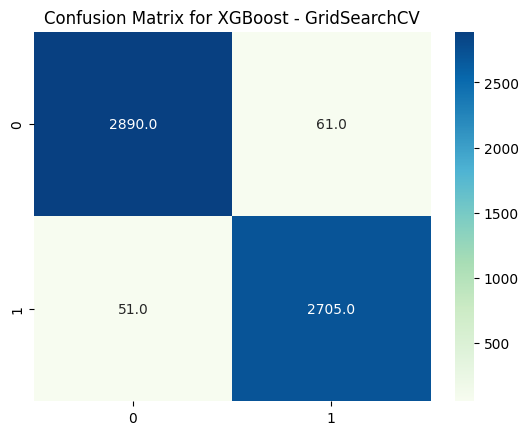

In [ ]:
#Evaluation of the model
predicted = xg_model_gridcv_best.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="GnBu")
plt.title("Confusion Matrix for XGBoost - GridSearchCV")

In [ ]:
metrics_df=add_metrics_details("XGBoost - GridSearchCV",y_test,predicted,metrics_df)

In [ ]:
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [6,8,10,12],
              'min_samples_split' : [10,50,100],
              'min_samples_leaf' : [30,40,50]}

### **RANDOM FOREST GRIDSEARCH CV:**

In [ ]:
rf_gridcv = GridSearchCV(estimator=rf,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

#Evaluating the optimal parameters
rf_gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   0.7s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   2.1s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.6s
[CV] END max_depth=6, min_samples_leaf=30, min_samples_split=10, n_estimators=80; total time=   1.2s
[CV] END max_depth=6, min_sa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [10, 50, 100],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
rf_gridcv.best_estimator_

RandomForestClassifier(max_depth=12, min_samples_leaf=40, min_samples_split=100,
                       n_estimators=80)

In [ ]:
rf_gridcv.best_params_

{'max_depth': 12,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 80}

In [ ]:
rf_gridcv_best = rf_gridcv.best_estimator_

In [ ]:
y_pred =rf_gridcv_best.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2951
           1       0.98      0.98      0.98      2756

    accuracy                           0.98      5707
   macro avg       0.98      0.98      0.98      5707
weighted avg       0.98      0.98      0.98      5707

Accuracy of the Model: 98.00245312773787%



Text(0.5, 1.0, 'Confusion Matrix for Random Forest - GridSearchCV')

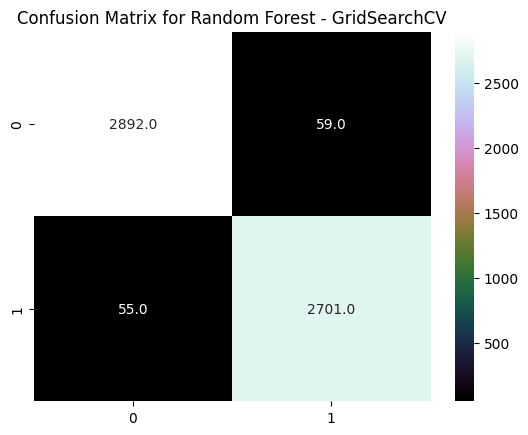

In [ ]:
#Evaluation of the model
predicted = rf_gridcv_best.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="cubehelix")
plt.title("Confusion Matrix for Random Forest - GridSearchCV")

In [ ]:
metrics_df=add_metrics_details("Random Forest - GridSearchCV",y_test,predicted,metrics_df)

### **KNN GRID-SEARCH CV:**

In [ ]:
knn_params = {'n_neighbors':np.arange(10,50,2)}
knn_cv = GridSearchCV(knc, knn_params, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48])})

In [ ]:
knn_cv.best_estimator_

KNeighborsClassifier(n_neighbors=44)

In [ ]:
knn_cv_best = knn_cv.best_estimator_

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2951
           1       0.98      0.98      0.98      2756

    accuracy                           0.98      5707
   macro avg       0.98      0.98      0.98      5707
weighted avg       0.98      0.98      0.98      5707

Accuracy of the Model: 97.86227439985981%



Text(0.5, 1.0, 'Confusion Matrix for KNN - GridSearchCV')

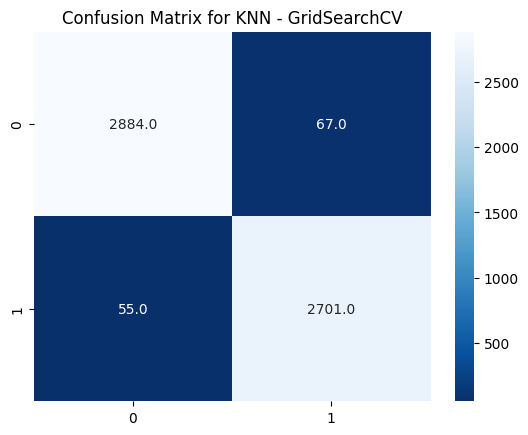

In [ ]:
#Evaluation of the model
predicted = knn_cv_best.predict(X_test)

print(classification_report(y_test, predicted))
cm = metrics.confusion_matrix( y_test,predicted)

print("Accuracy of the Model: {}%\n".format((accuracy_score( y_test,predicted))*100))
sns.heatmap(cm, annot=True, fmt = ".1f",cmap="Blues_r")
plt.title("Confusion Matrix for KNN - GridSearchCV")

In [ ]:
metrics_df=add_metrics_details("KNN - GridSearchCV",y_test,predicted,metrics_df)

# **CONCLUSION:**

#### **PREDICTION MODEL COMPARISON:**

In [ ]:
#printing the model accuracy dataframe
metrics_df

,MODEL NAME,ACCURACY,RECALL,PRECISION,F1-SCORE,ROC AUC SCORE
0,Logistic Regression,0.980025,0.981495,0.977240,0.979363,0.980073
1,Decision Tree,0.980025,0.981495,0.977240,0.979363,0.980073
2,XGBoost,0.977396,0.980044,0.973333,0.976677,0.977484
3,Light GBM,0.978798,0.980769,0.975460,0.978107,0.978863
4,Support Vector Machine,0.979849,0.981858,0.976543,0.979193,0.979916
5,Random Forest,0.980375,0.980769,0.978639,0.979703,0.980388
6,KNN Model,0.974943,0.974238,0.973885,0.974061,0.974920
7,XGBoost - GridSearchCV,0.980375,0.981495,0.977946,0.979717,0.980412
8,Random Forest - GridSearchCV,0.980025,0.980044,0.978623,0.979333,0.980025
9,KNN - GridSearchCV,0.978623,0.980044,0.975795,0.977915,0.978670


* Metrics like accuracy, precision, recall are good ways to evaluate classification models for balanced datasets, but if the data is imbalanced then other methods like ROC/AUC perform better in evaluating the model performance
* Since the accuracy model is easy to understand and use, it is one of the most used models in the market. However, there are problems with it; it can't be used for an imbalanced dataset. If the data considered in both cases is equal, we call it a balanced data.


***Because our dataset is balanced, let's select Accuracy as the evaluation metric.***

Text(0.5, 0, 'Model name')

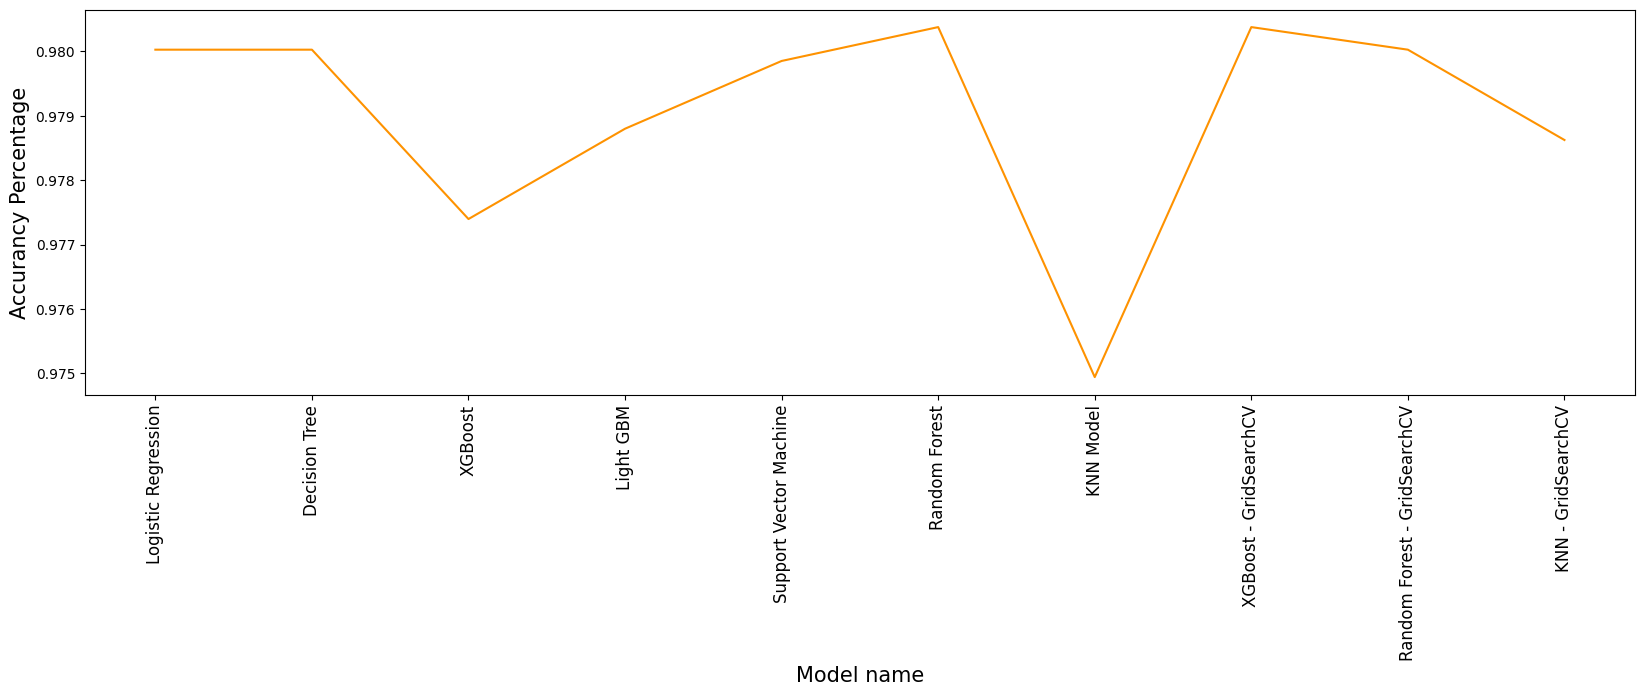

In [ ]:
# plot for algorithm comparison 
name = list(metrics_df['MODEL NAME'])
result = list(metrics_df['ACCURACY'])

plt.subplots(figsize=(20,5))
plt.plot(name , result)
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Accurancy Percentage',fontsize = 15)
plt.xlabel('Model name',fontsize = 15)



#### **EDA CONCLUSION :**

*   The overall rating for the 'Economy class' cabin type is favourable. As a result, it is recommended.
*  The Target column 'recommended' gives the insight of balanced data.
* The majority of airline passengers fall under the category of "solo leisure", followed by "couple leisure".
* The majority of reviewers are from the Economy Class cabin type.
* American Airlines get most reviews followed by United Airlines and British Airways.

#### **MODEL CONCLUSION :**
* Metrics like accuracy, precision, recall are good ways to evaluate classification models for balanced datasets. We will use Accuracy Since the accuracy model is easy to understand and use.
* ROC - AUC score is good for imbalanced data, but since there is no imbalance
we can use accuracy as metric.
* The best outcome is produced by XGBoost - GridsearchCV followed by Random Forest.
